<a href="https://colab.research.google.com/github/SinghSaheb44/Modelling-the-Crypto-Market-using-XGBoost-/blob/main/XGBoost_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2503]:
import numpy as np



In [2504]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
# Define the ticker symbol for Bitcoin
btc_ticker = "BTC-USD"

# Download the historical data for the given date range
btc_data = yf.download(btc_ticker, start="2018-01-01", end="2022-12-31")

# Display the first few rows of the data
print(btc_data)

[*********************100%***********************]  1 of 1 completed

                    Open          High           Low         Close  \
Date                                                                 
2018-01-01  14112.200195  14112.200195  13154.700195  13657.200195   
2018-01-02  13625.000000  15444.599609  13163.599609  14982.099609   
2018-01-03  14978.200195  15572.799805  14844.500000  15201.000000   
2018-01-04  15270.700195  15739.700195  14522.200195  15599.200195   
2018-01-05  15477.200195  17705.199219  15202.799805  17429.500000   
...                  ...           ...           ...           ...   
2022-12-26  16842.250000  16920.123047  16812.369141  16919.804688   
2022-12-27  16919.291016  16959.845703  16642.072266  16717.173828   
2022-12-28  16716.400391  16768.169922  16497.556641  16552.572266   
2022-12-29  16552.322266  16651.755859  16508.683594  16642.341797   
2022-12-30  16641.330078  16643.427734  16408.474609  16602.585938   

               Adj Close       Volume  
Date                                   
2018-01-0

# New Section

In [2505]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2506]:

file_path='/content/drive/My Drive/bitcoin_usd.csv'
df=pd.read_csv(file_path)
df_inverted = df.iloc[::-1]
df_inverted = df_inverted.reset_index(drop=True)
df =df_inverted
df

Start         End          Open          High           Low  \
0     2018-01-01  2018-01-02  14046.002764  14521.965544  12980.811131   
1     2018-01-02  2018-01-03  13644.693035  15468.208138  13195.873515   
2     2018-01-03  2018-01-04  14895.275367  15646.498638  14470.737671   
3     2018-01-04  2018-01-05  15168.972365  16708.709267  14286.669853   
4     2018-01-05  2018-01-06  15197.764745  17161.635004  14878.048174   
...          ...         ...           ...           ...           ...   
1821  2022-12-27  2022-12-28  16919.823027  16963.002980  16631.430000   
1822  2022-12-28  2022-12-29  16706.249402  16762.014600  16488.762900   
1823  2022-12-29  2022-12-30  16547.534921  16655.070278  16503.195500   
1824  2022-12-30  2022-12-31  16636.993115  16639.843547  16379.532500   
1825  2022-12-31  2023-01-01  16608.070868  16632.899700  16495.873732   

             Close        Volume    Market Cap  
0     13577.188555  9.527935e+09  2.292229e+11  
1     14938.176676  1.151926e+10  2.345984e+11  
2     15079.152185  1.548623e+10  2.538832e+11  
3     15163.898948  1.785376e+10  2.510367e+11  
4     16989.161482  1.960998e+10  2.718434e+11  
...            ...           ...           ...  
1821  16706.459710  3.144405e+10  3.229231e+11  
1822  16549.983266  3.860298e+10  3.197136e+11  
1823  16641.444864  4.178537e+10  3.188295e+11  
1824  16603.751953  3.645157e+10  3.180110e+11  
1825  16538.347900  3.406534e+10  3.183907e+11  

[1826 rows x 8 columns]

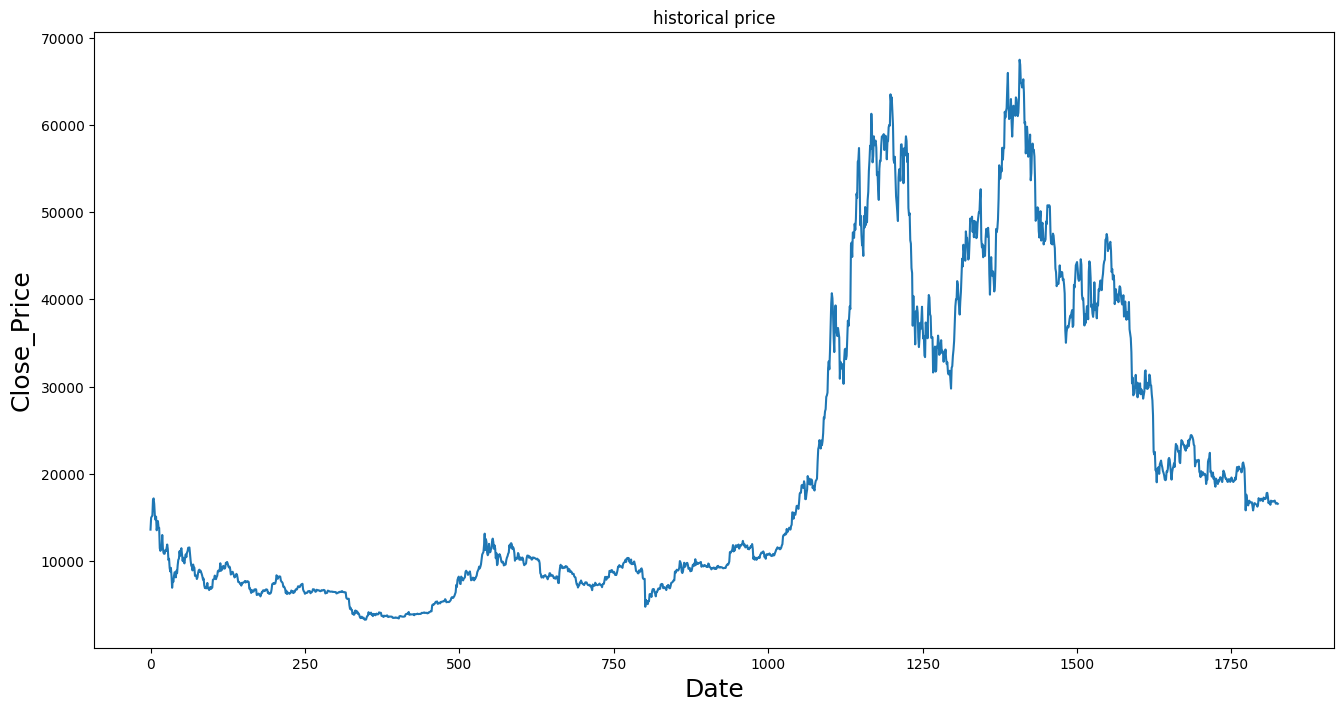

In [2507]:
plt.figure(figsize=(16,8))
plt.title('historical price')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close_Price', fontsize=18)
plt.show()

In [2508]:
!pip install pandas-ta
!pip install ta

In [2509]:
import pandas_ta as pt
import ta

In [2510]:
                                          #Trend Based Oscillator and Index Indicators

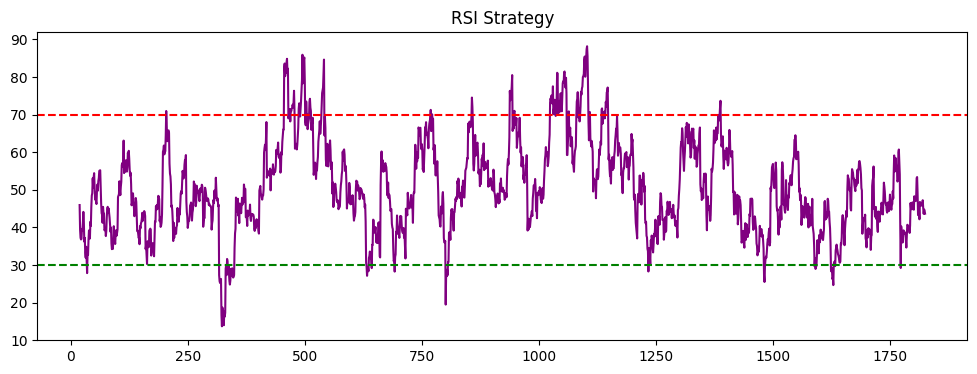

In [2511]:
#mean reversion strategy implementation
#RSI indicator
df['RSI_20']=ta.momentum.RSIIndicator(close=df['Close'],window=20).rsi()
plt.figure(figsize=(12,4))
plt.title('RSI Strategy')
plt.plot(df.index, df['RSI_20'], label='RSI_20', color='purple')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')

In [2512]:
!pip install mplfinance



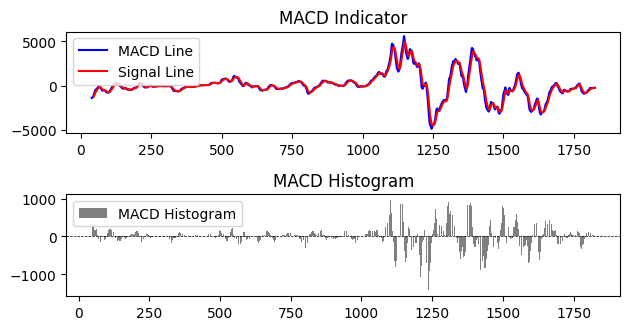

Start         End          Open          High           Low  \
0     2018-01-01  2018-01-02  14046.002764  14521.965544  12980.811131   
1     2018-01-02  2018-01-03  13644.693035  15468.208138  13195.873515   
2     2018-01-03  2018-01-04  14895.275367  15646.498638  14470.737671   
3     2018-01-04  2018-01-05  15168.972365  16708.709267  14286.669853   
4     2018-01-05  2018-01-06  15197.764745  17161.635004  14878.048174   
...          ...         ...           ...           ...           ...   
1821  2022-12-27  2022-12-28  16919.823027  16963.002980  16631.430000   
1822  2022-12-28  2022-12-29  16706.249402  16762.014600  16488.762900   
1823  2022-12-29  2022-12-30  16547.534921  16655.070278  16503.195500   
1824  2022-12-30  2022-12-31  16636.993115  16639.843547  16379.532500   
1825  2022-12-31  2023-01-01  16608.070868  16632.899700  16495.873732   

             Close        Volume    Market Cap     RSI_20  MACD_diff  
0     13577.188555  9.527935e+09  2.292229e+11        NaN        NaN  
1     14938.176676  1.151926e+10  2.345984e+11        NaN        NaN  
2     15079.152185  1.548623e+10  2.538832e+11        NaN        NaN  
3     15163.898948  1.785376e+10  2.510367e+11        NaN        NaN  
4     16989.161482  1.960998e+10  2.718434e+11        NaN        NaN  
...            ...           ...           ...        ...        ...  
1821  16706.459710  3.144405e+10  3.229231e+11  45.178431  26.107809  
1822  16549.983266  3.860298e+10  3.197136e+11  43.625623  16.324325  
1823  16641.444864  4.178537e+10  3.188295e+11  44.793094  13.773002  
1824  16603.751953  3.645157e+10  3.180110e+11  44.394263  11.072717  
1825  16538.347900  3.406534e+10  3.183907e+11  43.683836   7.240132  

[1826 rows x 10 columns]

In [2513]:
#implementing MACD indicator
macd=ta.trend.MACD(close=df['Close'],window_slow=39,window_fast=19,window_sign=9)
df['MACD']=macd.macd()
df['MACD_Signal']=macd.macd_signal()
df['MACD_diff']=macd.macd_diff()
#plot macd
#macd plot line
plt.subplot(3, 1, 1)
plt.plot(df['MACD'], label='MACD Line', color='blue')
plt.plot(df['MACD_Signal'], label='Signal Line', color='red')
plt.title('MACD Indicator')
plt.legend(loc='upper left')

#macd histogram
plt.subplot(3, 1, 2)
plt.bar(df.index, df['MACD_diff'], label='MACD Histogram', color='gray')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.title('MACD Histogram')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()
df.drop(['MACD','MACD_Signal'],axis=1)

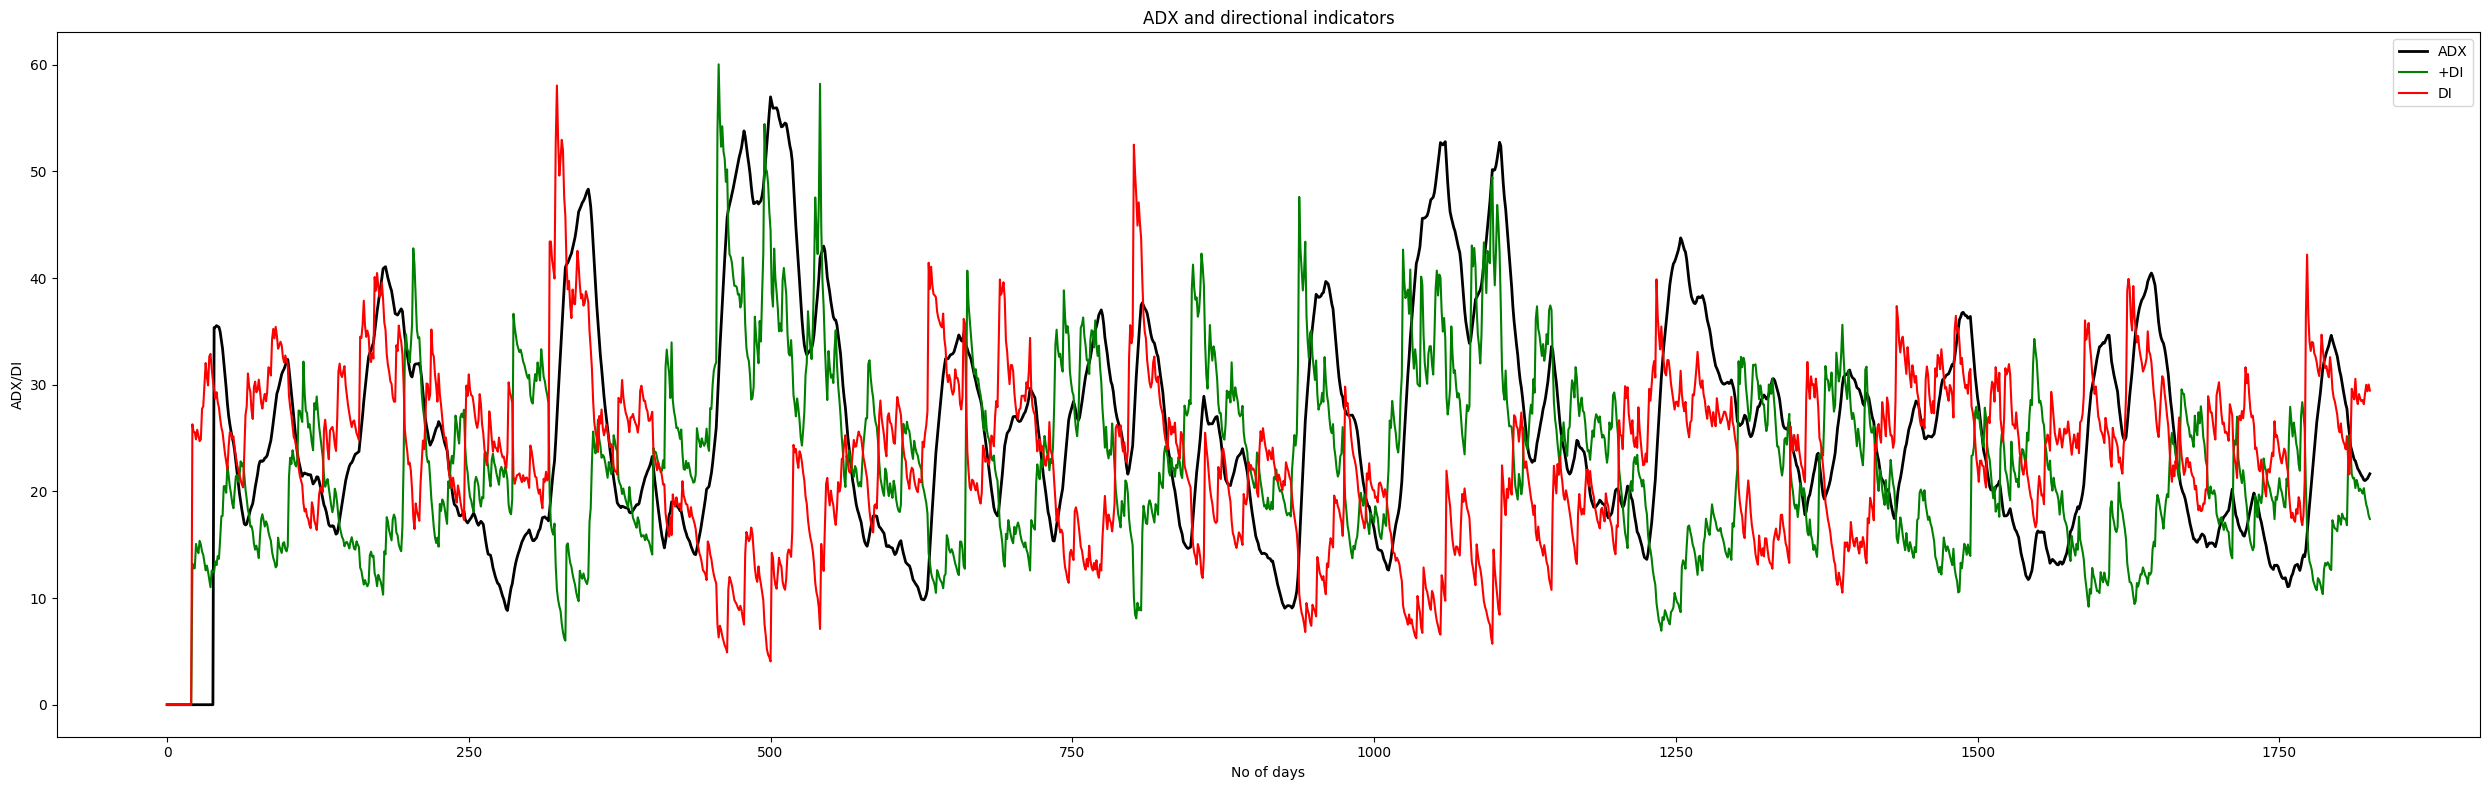

In [2514]:
#implementation of ADX indicator
adx_indicator=ta.trend.ADXIndicator(high=df['High'],low=df['Low'], close=df['Close'],window=20)
df['ADX']=adx_indicator.adx()
df['+DI']=adx_indicator.adx_pos()
df['-DI']=adx_indicator.adx_neg()
df
#plot the adx_indicator
plt.figure(figsize=(25,8))


plt.plot(df.index, df['ADX'], label='ADX',color='black', linewidth=2)
plt.plot(df.index, df['+DI'], label='+DI',color='green',linestyle='-')
plt.plot(df.index, df['-DI'], label='DI', color='red', linestyle='-')
plt.title('ADX and directional indicators')
plt.ylabel('ADX/DI')
plt.xlabel('No of days')
plt.legend()
plt.tight_layout()
plt.show()

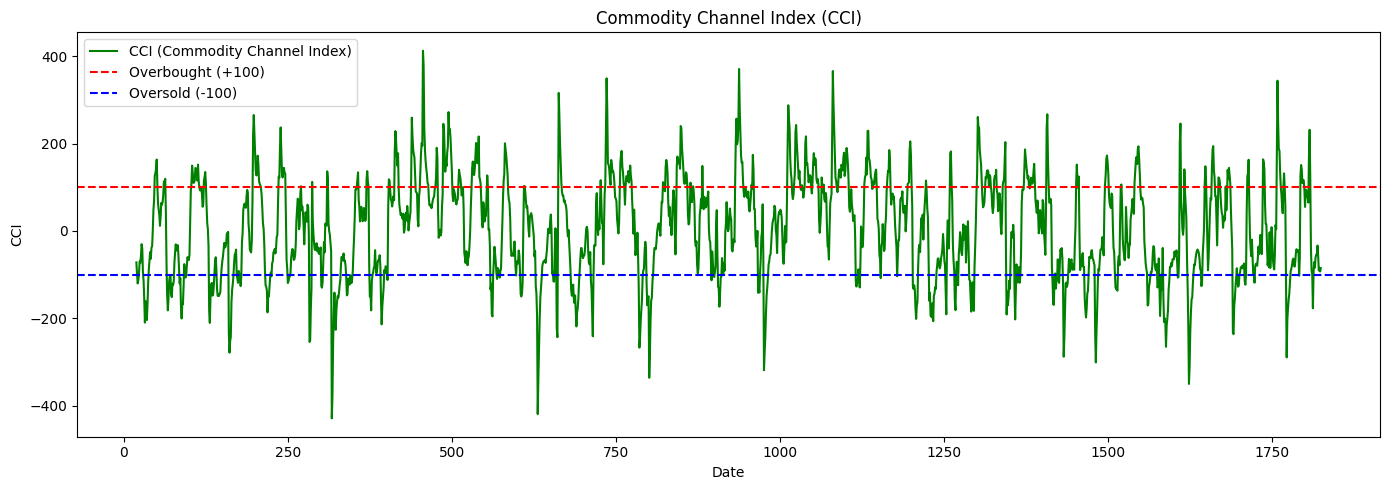

In [2515]:
#cci indicator implementation
df['CCI'] = ta.trend.CCIIndicator(high=df['High'], low=df['Low'], close=df['Close'], window=20, constant=0.015).cci()

#plot the cci indicator
plt.figure(figsize=(14,5))
plt.plot(df.index, df['CCI'], label='CCI (Commodity Channel Index)', color='green')
plt.axhline(100, color='red', linestyle='--', label='Overbought (+100)')
plt.axhline(-100, color='blue', linestyle='--', label='Oversold (-100)')
plt.title('Commodity Channel Index (CCI)')
plt.ylabel('CCI')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()

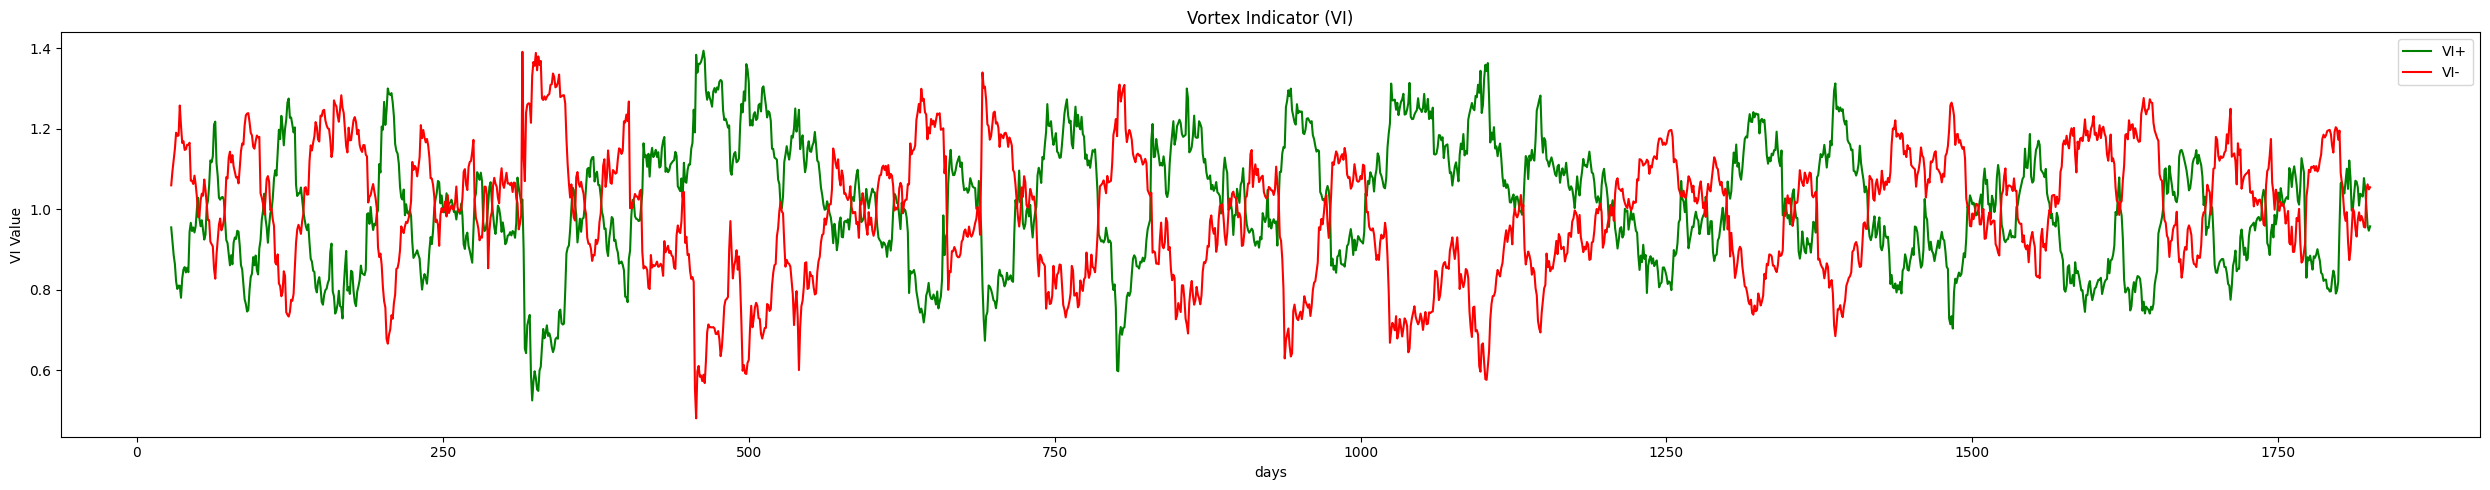

In [2516]:
#implementation of vortex indicator
vi=ta.trend.VortexIndicator(high=df['High'], low=df['Low'], close=df['Close'], window=28)
df['+VI']=vi.vortex_indicator_pos()
df['-VI']=vi.vortex_indicator_neg()

#plot the VI indicator
plt.figure(figsize=(25, 5))
plt.plot(df.index, df['+VI'], label='VI+', color='green')
plt.plot(df.index, df['-VI'], label='VI-', color='red')
plt.title('Vortex Indicator (VI)')
plt.ylabel('VI Value')
plt.xlabel('days')
plt.legend()
plt.tight_layout()
plt.show()


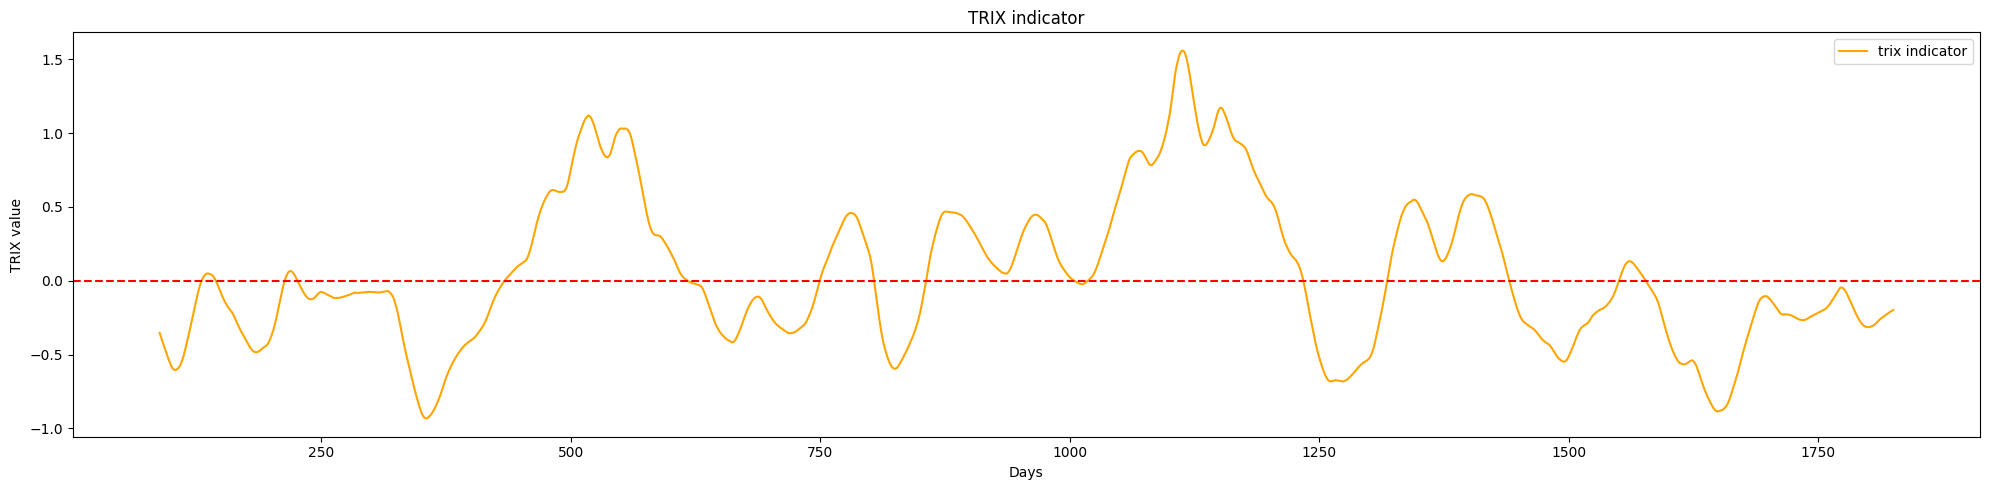

In [2517]:
#implementation of TRIX indicator
df['TRIX_30']=ta.trend.TRIXIndicator(close=df['Close'], window=30).trix()

#plot the trix indicator
plt.figure(figsize=(20,5))
plt.plot(df.index, df['TRIX_30'], label='trix indicator', color='orange')
plt.axhline(0, color='red', linestyle='--')
plt.title('TRIX indicator')
plt.ylabel('TRIX value')
plt.xlabel('Days')
plt.legend()
plt.tight_layout()
plt.show()


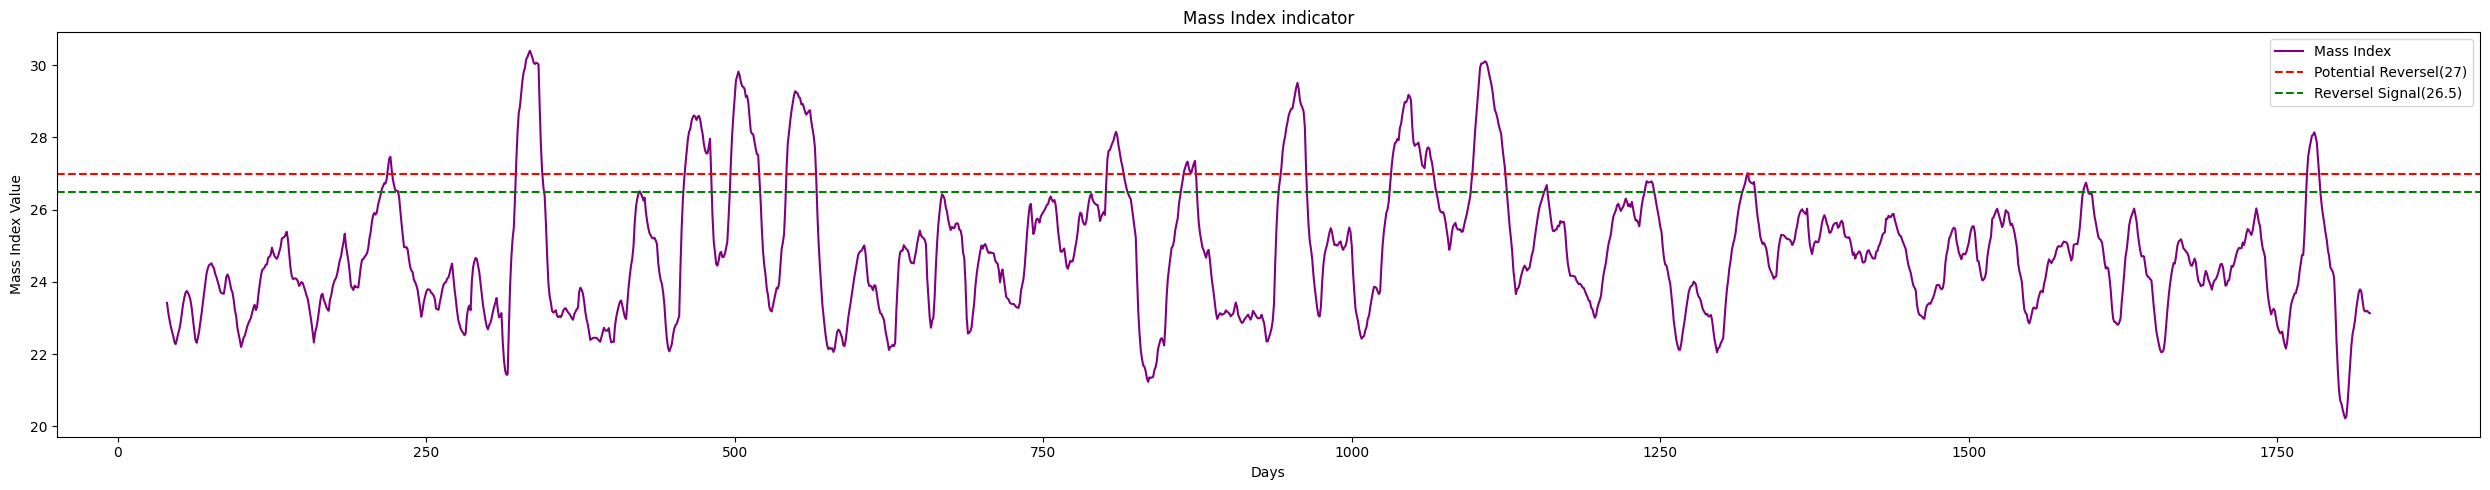

In [2518]:
#implementation of mass index indicator
df['Mass_Index']=ta.trend.MassIndex(high=df['High'], low=df['Low'], window_fast=9, window_slow=25).mass_index()
df
#plot the mass index
plt.figure(figsize=(25,5))
plt.plot(df.index, df['Mass_Index'], label='Mass Index', color='purple')
plt.axhline(27, color='red', linestyle='--', label='Potential Reversel(27)')
plt.axhline(26.5, color='green', linestyle='--', label='Reversel Signal(26.5)')
plt.title('Mass Index indicator')
plt.ylabel('Mass Index Value')
plt.xlabel('Days')
plt.legend()
plt.tight_layout()
plt.show()

In [2519]:
#implementation of DPO indicator
df['DPO']=ta.trend.DPOIndicator(close=df['Close'], window=20).dpo()
df

Start         End          Open          High           Low  \
0     2018-01-01  2018-01-02  14046.002764  14521.965544  12980.811131   
1     2018-01-02  2018-01-03  13644.693035  15468.208138  13195.873515   
2     2018-01-03  2018-01-04  14895.275367  15646.498638  14470.737671   
3     2018-01-04  2018-01-05  15168.972365  16708.709267  14286.669853   
4     2018-01-05  2018-01-06  15197.764745  17161.635004  14878.048174   
...          ...         ...           ...           ...           ...   
1821  2022-12-27  2022-12-28  16919.823027  16963.002980  16631.430000   
1822  2022-12-28  2022-12-29  16706.249402  16762.014600  16488.762900   
1823  2022-12-29  2022-12-30  16547.534921  16655.070278  16503.195500   
1824  2022-12-30  2022-12-31  16636.993115  16639.843547  16379.532500   
1825  2022-12-31  2023-01-01  16608.070868  16632.899700  16495.873732   

             Close        Volume    Market Cap     RSI_20        MACD  ...  \
0     13577.188555  9.527935e+09  2.292229e+11        NaN         NaN  ...   
1     14938.176676  1.151926e+10  2.345984e+11        NaN         NaN  ...   
2     15079.152185  1.548623e+10  2.538832e+11        NaN         NaN  ...   
3     15163.898948  1.785376e+10  2.510367e+11        NaN         NaN  ...   
4     16989.161482  1.960998e+10  2.718434e+11        NaN         NaN  ...   
...            ...           ...           ...        ...         ...  ...   
1821  16706.459710  3.144405e+10  3.229231e+11  45.178431 -233.177807  ...   
1822  16549.983266  3.860298e+10  3.197136e+11  43.625623 -238.880209  ...   
1823  16641.444864  4.178537e+10  3.188295e+11  44.793094 -237.988282  ...   
1824  16603.751953  3.645157e+10  3.180110e+11  44.394263 -237.920388  ...   
1825  16538.347900  3.406534e+10  3.183907e+11  43.683836 -239.942940  ...   

      MACD_diff        ADX        +DI        -DI        CCI       +VI  \
0           NaN   0.000000   0.000000   0.000000        NaN       NaN   
1           NaN   0.000000   0.000000   0.000000        NaN       NaN   
2           NaN   0.000000   0.000000   0.000000        NaN       NaN   
3           NaN   0.000000   0.000000   0.000000        NaN       NaN   
4           NaN   0.000000   0.000000   0.000000        NaN       NaN   
...         ...        ...        ...        ...        ...       ...   
1821  26.107809  21.011390  19.452266  29.183679 -57.918033  1.053129   
1822  16.324325  21.111523  18.769709  29.991675 -90.506242  1.005414   
1823  13.773002  21.206649  18.392136  29.388362 -84.327050  0.958060   
1824  11.072717  21.431082  17.744181  30.016409 -92.842953  0.946697   
1825   7.240132  21.644293  17.406469  29.445128 -85.380262  0.957509   

           -VI   TRIX_30  Mass_Index         DPO  
0          NaN       NaN         NaN         NaN  
1          NaN       NaN         NaN         NaN  
2          NaN       NaN         NaN         NaN  
3          NaN       NaN         NaN         NaN  
4          NaN       NaN         NaN         NaN  
...        ...       ...         ...         ...  
1821  0.954574 -0.213969   23.181594 -385.052747  
1822  1.048800 -0.209623   23.196708 -172.410733  
1823  1.061728 -0.205473   23.195232 -183.440128  
1824  1.049194 -0.201538   23.151057 -483.879793  
1825  1.054337 -0.197872   23.135051   21.544116  

[1826 rows x 21 columns]

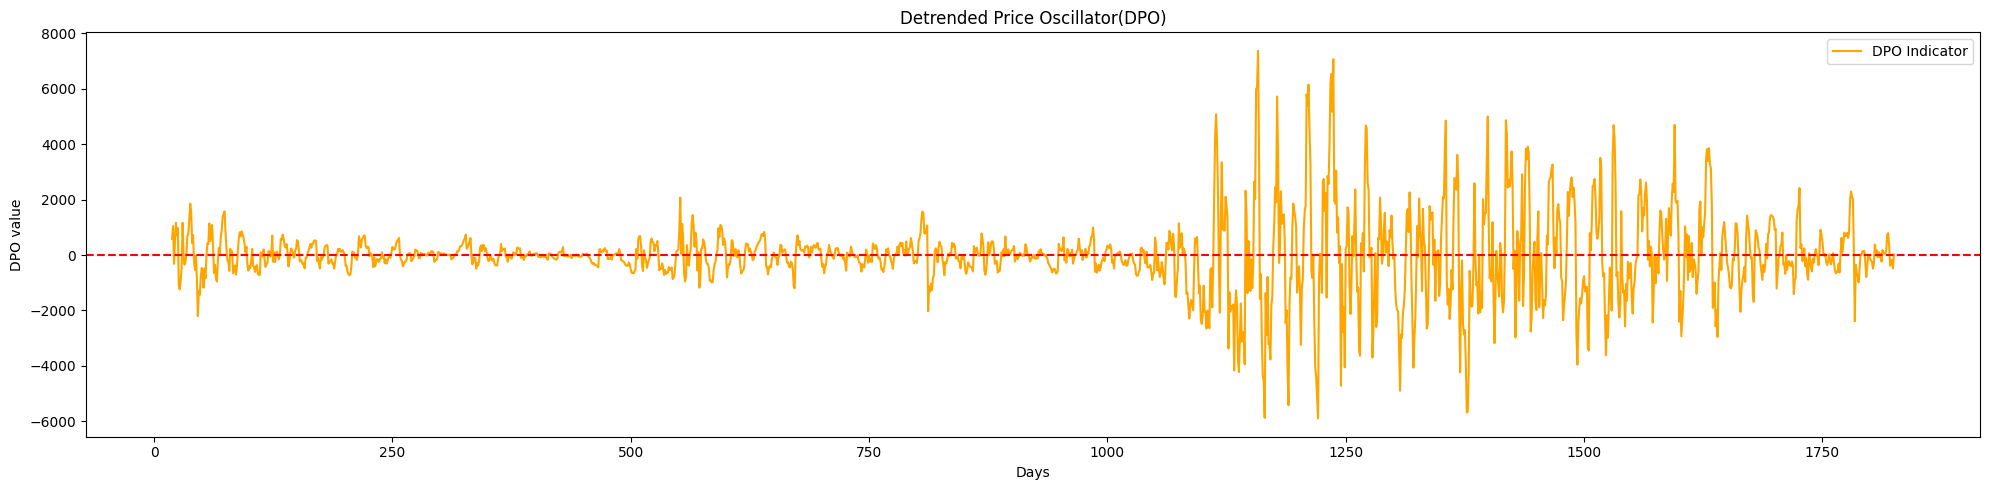

In [2520]:
#plot the DPO indicator
plt.figure(figsize=(20,5))
plt.plot(df.index, df['DPO'], label='DPO Indicator', color='orange')
plt.axhline(0, color='red', linestyle='--')
plt.title('Detrended Price Oscillator(DPO)')
plt.ylabel('DPO value')
plt.xlabel('Days')
plt.legend()
plt.tight_layout()
plt.show()

In [2521]:
#Implementation of KST Oscillator indicator
kst=ta.trend.KSTIndicator(close=df['Close'], roc1=10, roc2=15, roc3=20, roc4=30)
df['KST']=kst.kst()
df['KST_Signal']=kst.kst_sig()
df

Start         End          Open          High           Low  \
0     2018-01-01  2018-01-02  14046.002764  14521.965544  12980.811131   
1     2018-01-02  2018-01-03  13644.693035  15468.208138  13195.873515   
2     2018-01-03  2018-01-04  14895.275367  15646.498638  14470.737671   
3     2018-01-04  2018-01-05  15168.972365  16708.709267  14286.669853   
4     2018-01-05  2018-01-06  15197.764745  17161.635004  14878.048174   
...          ...         ...           ...           ...           ...   
1821  2022-12-27  2022-12-28  16919.823027  16963.002980  16631.430000   
1822  2022-12-28  2022-12-29  16706.249402  16762.014600  16488.762900   
1823  2022-12-29  2022-12-30  16547.534921  16655.070278  16503.195500   
1824  2022-12-30  2022-12-31  16636.993115  16639.843547  16379.532500   
1825  2022-12-31  2023-01-01  16608.070868  16632.899700  16495.873732   

             Close        Volume    Market Cap     RSI_20        MACD  ...  \
0     13577.188555  9.527935e+09  2.292229e+11        NaN         NaN  ...   
1     14938.176676  1.151926e+10  2.345984e+11        NaN         NaN  ...   
2     15079.152185  1.548623e+10  2.538832e+11        NaN         NaN  ...   
3     15163.898948  1.785376e+10  2.510367e+11        NaN         NaN  ...   
4     16989.161482  1.960998e+10  2.718434e+11        NaN         NaN  ...   
...            ...           ...           ...        ...         ...  ...   
1821  16706.459710  3.144405e+10  3.229231e+11  45.178431 -233.177807  ...   
1822  16549.983266  3.860298e+10  3.197136e+11  43.625623 -238.880209  ...   
1823  16641.444864  4.178537e+10  3.188295e+11  44.793094 -237.988282  ...   
1824  16603.751953  3.645157e+10  3.180110e+11  44.394263 -237.920388  ...   
1825  16538.347900  3.406534e+10  3.183907e+11  43.683836 -239.942940  ...   

            +DI        -DI        CCI       +VI       -VI   TRIX_30  \
0      0.000000   0.000000        NaN       NaN       NaN       NaN   
1      0.000000   0.000000        NaN       NaN       NaN       NaN   
2      0.000000   0.000000        NaN       NaN       NaN       NaN   
3      0.000000   0.000000        NaN       NaN       NaN       NaN   
4      0.000000   0.000000        NaN       NaN       NaN       NaN   
...         ...        ...        ...       ...       ...       ...   
1821  19.452266  29.183679 -57.918033  1.053129  0.954574 -0.213969   
1822  18.769709  29.991675 -90.506242  1.005414  1.048800 -0.209623   
1823  18.392136  29.388362 -84.327050  0.958060  1.061728 -0.205473   
1824  17.744181  30.016409 -92.842953  0.946697  1.049194 -0.201538   
1825  17.406469  29.445128 -85.380262  0.957509  1.054337 -0.197872   

      Mass_Index         DPO       KST  KST_Signal  
0            NaN         NaN       NaN         NaN  
1            NaN         NaN       NaN         NaN  
2            NaN         NaN       NaN         NaN  
3            NaN         NaN       NaN         NaN  
4            NaN         NaN       NaN         NaN  
...          ...         ...       ...         ...  
1821   23.181594 -385.052747  2.957348    8.671836  
1822   23.196708 -172.410733 -2.035194    7.559142  
1823   23.195232 -183.440128 -4.336901    5.799106  
1824   23.151057 -483.879793 -7.176260    3.444815  
1825   23.135051   21.544116 -8.182988    0.730564  

[1826 rows x 23 columns]

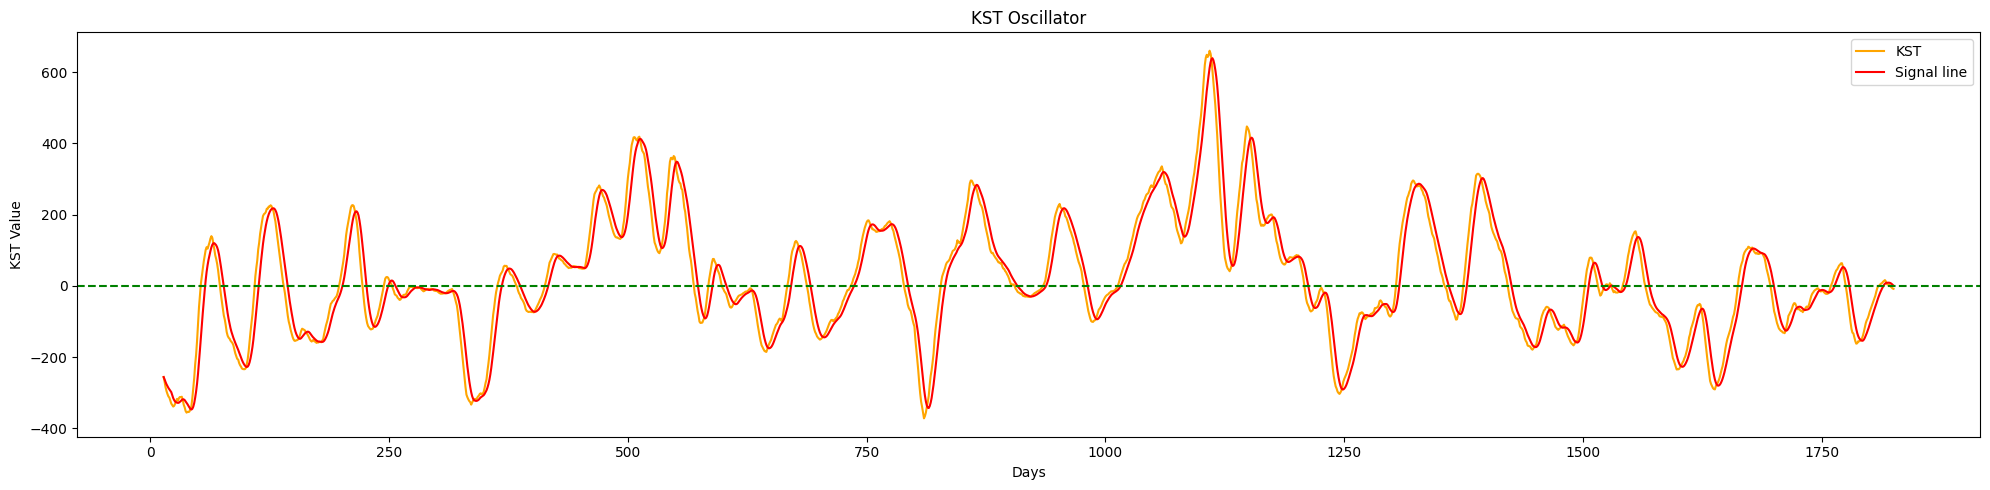

In [2522]:
#plot the KST Oscillator indicator
plt.figure(figsize=(20,5))
plt.plot(df.index, df['KST'], label='KST', color='orange')
plt.plot(df.index, df['KST_Signal'], label='Signal line', color='red')
plt.axhline(0,color='green', linestyle='--')
plt.title('KST Oscillator')
plt.ylabel('KST Value')
plt.xlabel('Days')
plt.legend()
plt.tight_layout()
plt.show()
df=df.drop('KST',axis=1)

In [2523]:
#Implementation of schaff trend cycle(STC) Indicator
df['STC']=ta.trend.STCIndicator(close=df['Close'], window_slow=50, window_fast=23, cycle=10).stc()
df

Start         End          Open          High           Low  \
0     2018-01-01  2018-01-02  14046.002764  14521.965544  12980.811131   
1     2018-01-02  2018-01-03  13644.693035  15468.208138  13195.873515   
2     2018-01-03  2018-01-04  14895.275367  15646.498638  14470.737671   
3     2018-01-04  2018-01-05  15168.972365  16708.709267  14286.669853   
4     2018-01-05  2018-01-06  15197.764745  17161.635004  14878.048174   
...          ...         ...           ...           ...           ...   
1821  2022-12-27  2022-12-28  16919.823027  16963.002980  16631.430000   
1822  2022-12-28  2022-12-29  16706.249402  16762.014600  16488.762900   
1823  2022-12-29  2022-12-30  16547.534921  16655.070278  16503.195500   
1824  2022-12-30  2022-12-31  16636.993115  16639.843547  16379.532500   
1825  2022-12-31  2023-01-01  16608.070868  16632.899700  16495.873732   

             Close        Volume    Market Cap     RSI_20        MACD  ...  \
0     13577.188555  9.527935e+09  2.292229e+11        NaN         NaN  ...   
1     14938.176676  1.151926e+10  2.345984e+11        NaN         NaN  ...   
2     15079.152185  1.548623e+10  2.538832e+11        NaN         NaN  ...   
3     15163.898948  1.785376e+10  2.510367e+11        NaN         NaN  ...   
4     16989.161482  1.960998e+10  2.718434e+11        NaN         NaN  ...   
...            ...           ...           ...        ...         ...  ...   
1821  16706.459710  3.144405e+10  3.229231e+11  45.178431 -233.177807  ...   
1822  16549.983266  3.860298e+10  3.197136e+11  43.625623 -238.880209  ...   
1823  16641.444864  4.178537e+10  3.188295e+11  44.793094 -237.988282  ...   
1824  16603.751953  3.645157e+10  3.180110e+11  44.394263 -237.920388  ...   
1825  16538.347900  3.406534e+10  3.183907e+11  43.683836 -239.942940  ...   

            +DI        -DI        CCI       +VI       -VI   TRIX_30  \
0      0.000000   0.000000        NaN       NaN       NaN       NaN   
1      0.000000   0.000000        NaN       NaN       NaN       NaN   
2      0.000000   0.000000        NaN       NaN       NaN       NaN   
3      0.000000   0.000000        NaN       NaN       NaN       NaN   
4      0.000000   0.000000        NaN       NaN       NaN       NaN   
...         ...        ...        ...       ...       ...       ...   
1821  19.452266  29.183679 -57.918033  1.053129  0.954574 -0.213969   
1822  18.769709  29.991675 -90.506242  1.005414  1.048800 -0.209623   
1823  18.392136  29.388362 -84.327050  0.958060  1.061728 -0.205473   
1824  17.744181  30.016409 -92.842953  0.946697  1.049194 -0.201538   
1825  17.406469  29.445128 -85.380262  0.957509  1.054337 -0.197872   

      Mass_Index         DPO  KST_Signal        STC  
0            NaN         NaN         NaN        NaN  
1            NaN         NaN         NaN        NaN  
2            NaN         NaN         NaN        NaN  
3            NaN         NaN         NaN        NaN  
4            NaN         NaN         NaN        NaN  
...          ...         ...         ...        ...  
1821   23.181594 -385.052747    8.671836  98.148184  
1822   23.196708 -172.410733    7.559142  91.364368  
1823   23.195232 -183.440128    5.799106  90.810524  
1824   23.151057 -483.879793    3.444815  90.891764  
1825   23.135051   21.544116    0.730564  91.666037  

[1826 rows x 23 columns]

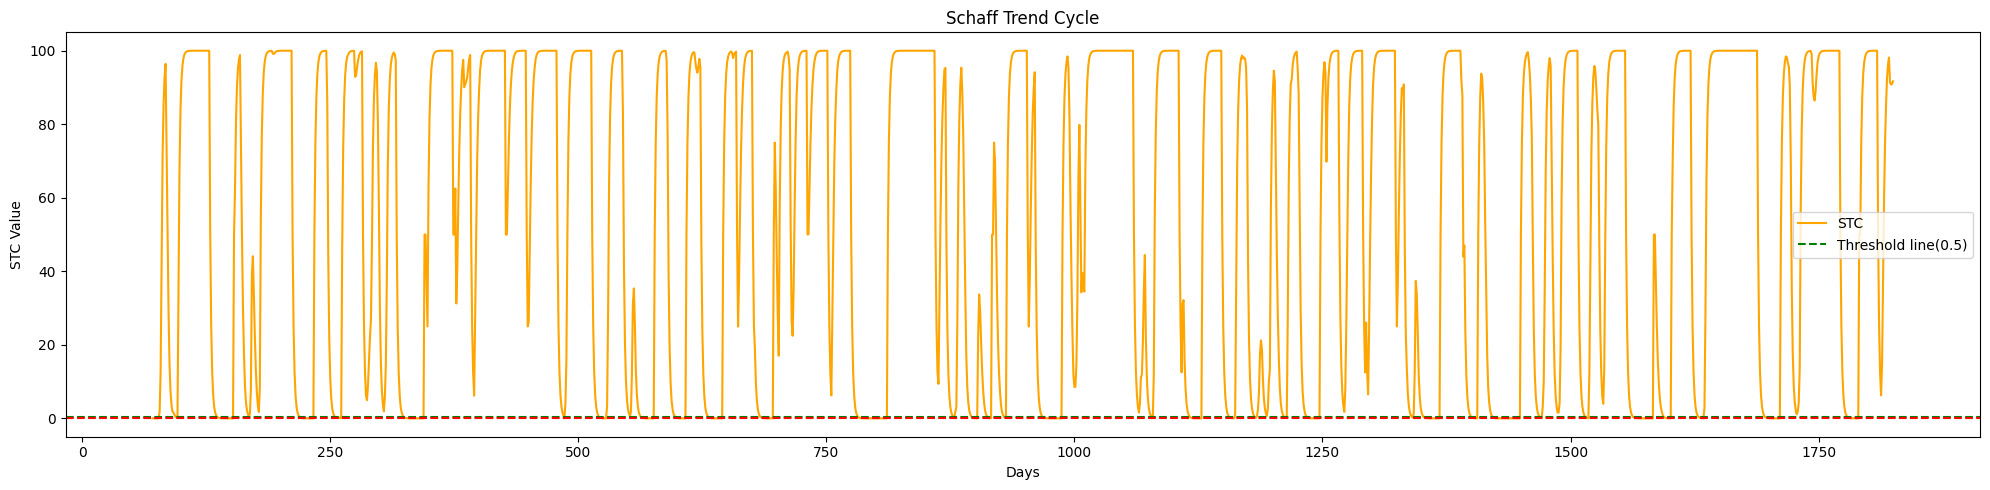

In [2524]:
#plot the STC Indicator
plt.figure(figsize=(20,5))
plt.plot(df.index, df['STC'], label='STC', color='orange')
plt.axhline(0.5, color='green', linestyle='--',label='Threshold line(0.5)')
plt.axhline(0, color='red', linestyle='--')
plt.title('Schaff Trend Cycle')
plt.ylabel('STC Value')
plt.xlabel('Days')
plt.legend()
plt.tight_layout()
plt.show()

<Axes: >

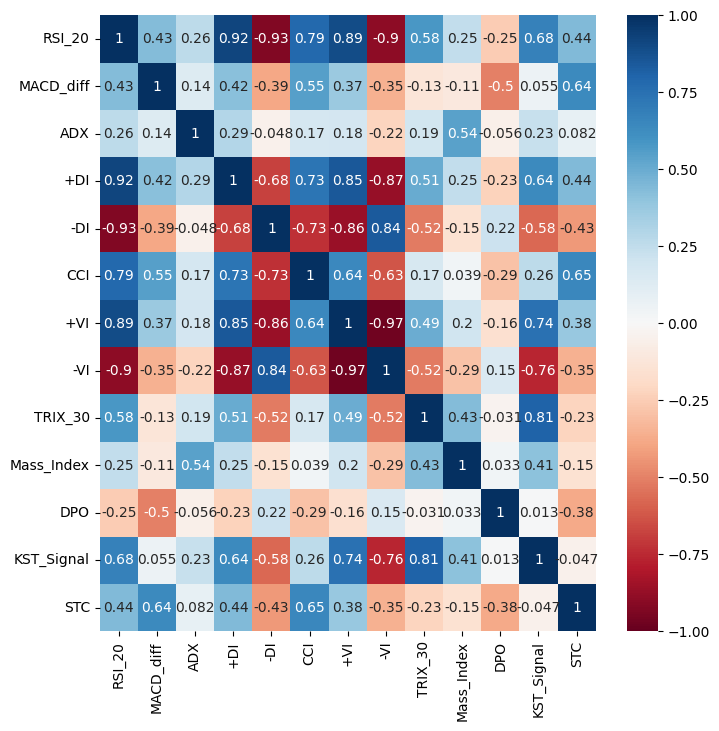

In [2525]:
import seaborn as sns
dataframe = df[['RSI_20','MACD_diff','ADX','+DI','-DI','CCI','+VI','-VI','TRIX_30','Mass_Index','DPO','KST_Signal','STC']]
corr = dataframe.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cmap='RdBu', vmin=-1,vmax = 1, annot=True)

In [2526]:
print(f'{df.shape[1]}')
#Dropping one of highly pairwise correlated features
upper_tri = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
# Drop the highly correlated features
df = df.drop(columns=to_drop)
print(f'{df.shape[1]}')

23
19


In [2527]:
                            ## Momentum Based Oscillator and Index Indicators


In [2528]:
# Stochastic Oscillator Implementation
# SLow Stochastic Oscillator to reduce noise and false signals
slow_stochastic_oscillator = ta.momentum.StochasticOscillator(high=df['High'], low=df['Low'], close=df['Close'], window=14, smooth_window=3)
df['%D_Slow'] = slow_stochastic_oscillator.stoch_signal()
df['%K_Slow'] = slow_stochastic_oscillator.stoch()
#Fast Stochastic oscillator to generate more trading signals
fast_stochastic_oscillator = ta.momentum.StochasticOscillator(high=df['High'], low=df['Low'], close=df['Close'], window=14, smooth_window=1)
df['%D_fast'] = fast_stochastic_oscillator.stoch_signal()
df['%K_fast'] = fast_stochastic_oscillator.stoch()
df

# Both slow and fast stochastic oscillator can be used independently but we can also you them combined to be more sure about the trends

Start         End          Open          High           Low  \
0     2018-01-01  2018-01-02  14046.002764  14521.965544  12980.811131   
1     2018-01-02  2018-01-03  13644.693035  15468.208138  13195.873515   
2     2018-01-03  2018-01-04  14895.275367  15646.498638  14470.737671   
3     2018-01-04  2018-01-05  15168.972365  16708.709267  14286.669853   
4     2018-01-05  2018-01-06  15197.764745  17161.635004  14878.048174   
...          ...         ...           ...           ...           ...   
1821  2022-12-27  2022-12-28  16919.823027  16963.002980  16631.430000   
1822  2022-12-28  2022-12-29  16706.249402  16762.014600  16488.762900   
1823  2022-12-29  2022-12-30  16547.534921  16655.070278  16503.195500   
1824  2022-12-30  2022-12-31  16636.993115  16639.843547  16379.532500   
1825  2022-12-31  2023-01-01  16608.070868  16632.899700  16495.873732   

             Close        Volume    Market Cap     RSI_20        MACD  ...  \
0     13577.188555  9.527935e+09  2.292229e+11        NaN         NaN  ...   
1     14938.176676  1.151926e+10  2.345984e+11        NaN         NaN  ...   
2     15079.152185  1.548623e+10  2.538832e+11        NaN         NaN  ...   
3     15163.898948  1.785376e+10  2.510367e+11        NaN         NaN  ...   
4     16989.161482  1.960998e+10  2.718434e+11        NaN         NaN  ...   
...            ...           ...           ...        ...         ...  ...   
1821  16706.459710  3.144405e+10  3.229231e+11  45.178431 -233.177807  ...   
1822  16549.983266  3.860298e+10  3.197136e+11  43.625623 -238.880209  ...   
1823  16641.444864  4.178537e+10  3.188295e+11  44.793094 -237.988282  ...   
1824  16603.751953  3.645157e+10  3.180110e+11  44.394263 -237.920388  ...   
1825  16538.347900  3.406534e+10  3.183907e+11  43.683836 -239.942940  ...   

            -DI        CCI   TRIX_30  Mass_Index         DPO        STC  \
0      0.000000        NaN       NaN         NaN         NaN        NaN   
1      0.000000        NaN       NaN         NaN         NaN        NaN   
2      0.000000        NaN       NaN         NaN         NaN        NaN   
3      0.000000        NaN       NaN         NaN         NaN        NaN   
4      0.000000        NaN       NaN         NaN         NaN        NaN   
...         ...        ...       ...         ...         ...        ...   
1821  29.183679 -57.918033 -0.213969   23.181594 -385.052747  98.148184   
1822  29.991675 -90.506242 -0.209623   23.196708 -172.410733  91.364368   
1823  29.388362 -84.327050 -0.205473   23.195232 -183.440128  90.810524   
1824  30.016409 -92.842953 -0.201538   23.151057 -483.879793  90.891764   
1825  29.445128 -85.380262 -0.197872   23.135051   21.544116  91.666037   

        %D_Slow    %K_Slow    %D_fast    %K_fast  
0           NaN        NaN        NaN        NaN  
1           NaN        NaN        NaN        NaN  
2           NaN        NaN        NaN        NaN  
3           NaN        NaN        NaN        NaN  
4           NaN        NaN        NaN        NaN  
...         ...        ...        ...        ...  
1821  22.861113  17.326645  17.326645  17.326645  
1822  19.135016  12.437205  12.437205  12.437205  
1823  17.912601  23.973953  23.973953  23.973953  
1824  24.734120  37.791202  37.791202  37.791202  
1825  29.715495  27.381330  27.381330  27.381330  

[1826 rows x 23 columns]

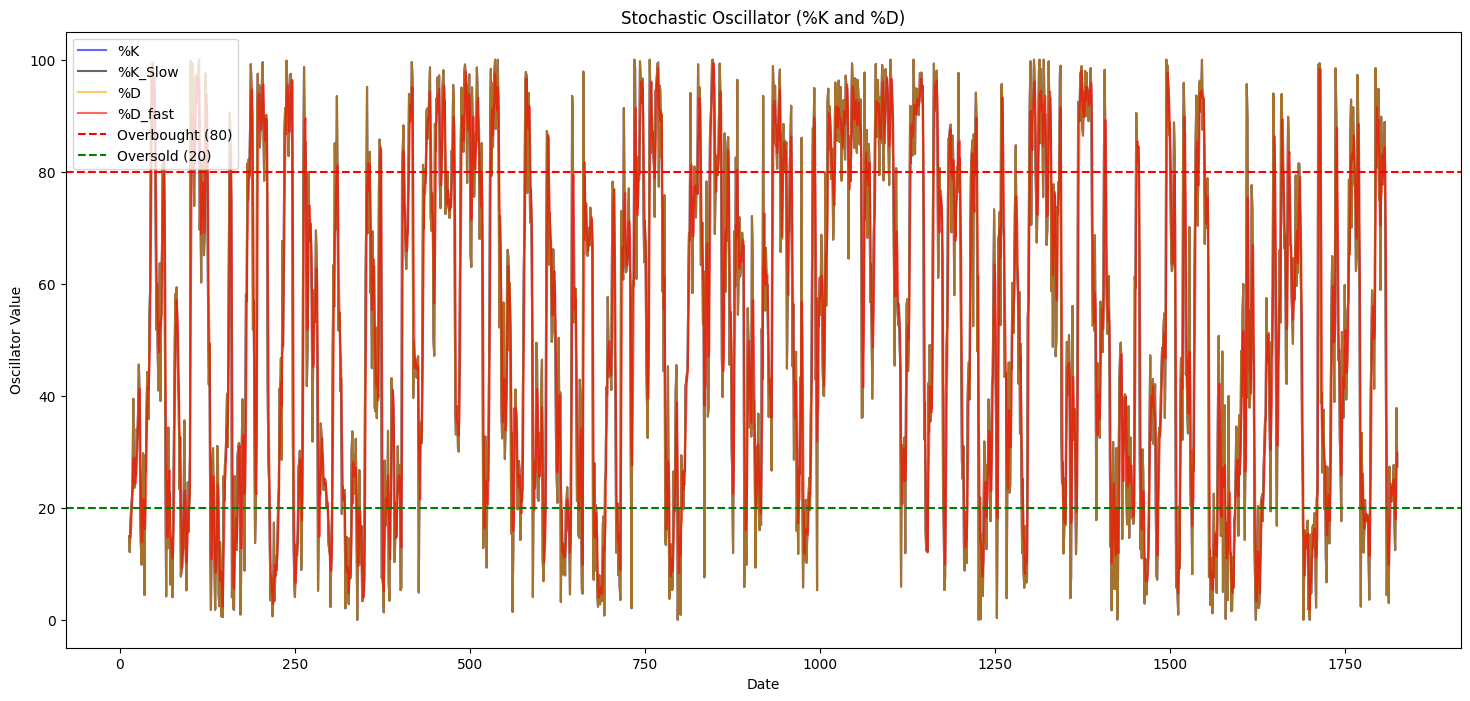

In [2529]:
plt.figure(figsize=(18, 8))

# Plot the %K and %D lines
plt.plot(df.index, df['%K_fast'], label='%K', color='blue', alpha=0.6)
plt.plot(df.index, df['%K_Slow'], label='%K_Slow', color='black', alpha=0.6)

plt.plot(df.index, df['%D_fast'], label='%D', color='orange', alpha=0.6)
plt.plot(df.index, df['%D_Slow'], label='%D_fast', color='red', alpha=0.6)
# Overbought/Oversold Levels
plt.axhline(80, color='red', linestyle='--', label='Overbought (80)')
plt.axhline(20, color='green', linestyle='--', label='Oversold (20)')

# Labels and Title
plt.title('Stochastic Oscillator (%K and %D)')
plt.ylabel('Oscillator Value')
plt.xlabel('Date')

# Add Legend
plt.legend(loc='upper left')

# Show Plot
plt.show()

In [2530]:
#Implementation of TSI Indicator
df['TSI']=ta.momentum.TSIIndicator(close=df['Close'], window_slow=25, window_fast=13).tsi()
df

Start         End          Open          High           Low  \
0     2018-01-01  2018-01-02  14046.002764  14521.965544  12980.811131   
1     2018-01-02  2018-01-03  13644.693035  15468.208138  13195.873515   
2     2018-01-03  2018-01-04  14895.275367  15646.498638  14470.737671   
3     2018-01-04  2018-01-05  15168.972365  16708.709267  14286.669853   
4     2018-01-05  2018-01-06  15197.764745  17161.635004  14878.048174   
...          ...         ...           ...           ...           ...   
1821  2022-12-27  2022-12-28  16919.823027  16963.002980  16631.430000   
1822  2022-12-28  2022-12-29  16706.249402  16762.014600  16488.762900   
1823  2022-12-29  2022-12-30  16547.534921  16655.070278  16503.195500   
1824  2022-12-30  2022-12-31  16636.993115  16639.843547  16379.532500   
1825  2022-12-31  2023-01-01  16608.070868  16632.899700  16495.873732   

             Close        Volume    Market Cap     RSI_20        MACD  ...  \
0     13577.188555  9.527935e+09  2.292229e+11        NaN         NaN  ...   
1     14938.176676  1.151926e+10  2.345984e+11        NaN         NaN  ...   
2     15079.152185  1.548623e+10  2.538832e+11        NaN         NaN  ...   
3     15163.898948  1.785376e+10  2.510367e+11        NaN         NaN  ...   
4     16989.161482  1.960998e+10  2.718434e+11        NaN         NaN  ...   
...            ...           ...           ...        ...         ...  ...   
1821  16706.459710  3.144405e+10  3.229231e+11  45.178431 -233.177807  ...   
1822  16549.983266  3.860298e+10  3.197136e+11  43.625623 -238.880209  ...   
1823  16641.444864  4.178537e+10  3.188295e+11  44.793094 -237.988282  ...   
1824  16603.751953  3.645157e+10  3.180110e+11  44.394263 -237.920388  ...   
1825  16538.347900  3.406534e+10  3.183907e+11  43.683836 -239.942940  ...   

            CCI   TRIX_30  Mass_Index         DPO        STC    %D_Slow  \
0           NaN       NaN         NaN         NaN        NaN        NaN   
1           NaN       NaN         NaN         NaN        NaN        NaN   
2           NaN       NaN         NaN         NaN        NaN        NaN   
3           NaN       NaN         NaN         NaN        NaN        NaN   
4           NaN       NaN         NaN         NaN        NaN        NaN   
...         ...       ...         ...         ...        ...        ...   
1821 -57.918033 -0.213969   23.181594 -385.052747  98.148184  22.861113   
1822 -90.506242 -0.209623   23.196708 -172.410733  91.364368  19.135016   
1823 -84.327050 -0.205473   23.195232 -183.440128  90.810524  17.912601   
1824 -92.842953 -0.201538   23.151057 -483.879793  90.891764  24.734120   
1825 -85.380262 -0.197872   23.135051   21.544116  91.666037  29.715495   

        %K_Slow    %D_fast    %K_fast       TSI  
0           NaN        NaN        NaN       NaN  
1           NaN        NaN        NaN       NaN  
2           NaN        NaN        NaN       NaN  
3           NaN        NaN        NaN       NaN  
4           NaN        NaN        NaN       NaN  
...         ...        ...        ...       ...  
1821  17.326645  17.326645  17.326645 -6.176676  
1822  12.437205  12.437205  12.437205 -7.329547  
1823  23.973953  23.973953  23.973953 -7.814096  
1824  37.791202  37.791202  37.791202 -8.397979  
1825  27.381330  27.381330  27.381330 -9.206487  

[1826 rows x 24 columns]

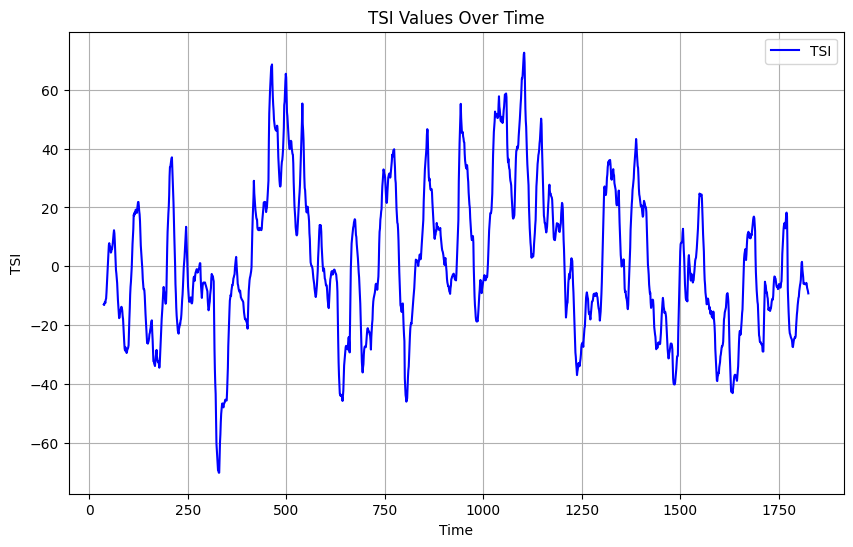

In [2531]:
plt.figure(figsize=(10, 6))  # Optional: to specify the figure size
plt.plot(df['TSI'],linestyle='-',color='b', label='TSI')

# Adding labels and title
plt.title('TSI Values Over Time')
plt.xlabel('Time')
plt.ylabel('TSI')

# Optional: Adding grid and legend
plt.grid(True)
plt.legend()

# Display the plot
plt.show()

In [2532]:
#Implementation of Ultimate Oscillator Indicator
df['UO']=ta.momentum.UltimateOscillator(high=df['High'], low=df['Low'], close=df['Close'], window1=7, window2=14, window3=28).ultimate_oscillator()
df

Start         End          Open          High           Low  \
0     2018-01-01  2018-01-02  14046.002764  14521.965544  12980.811131   
1     2018-01-02  2018-01-03  13644.693035  15468.208138  13195.873515   
2     2018-01-03  2018-01-04  14895.275367  15646.498638  14470.737671   
3     2018-01-04  2018-01-05  15168.972365  16708.709267  14286.669853   
4     2018-01-05  2018-01-06  15197.764745  17161.635004  14878.048174   
...          ...         ...           ...           ...           ...   
1821  2022-12-27  2022-12-28  16919.823027  16963.002980  16631.430000   
1822  2022-12-28  2022-12-29  16706.249402  16762.014600  16488.762900   
1823  2022-12-29  2022-12-30  16547.534921  16655.070278  16503.195500   
1824  2022-12-30  2022-12-31  16636.993115  16639.843547  16379.532500   
1825  2022-12-31  2023-01-01  16608.070868  16632.899700  16495.873732   

             Close        Volume    Market Cap     RSI_20        MACD  ...  \
0     13577.188555  9.527935e+09  2.292229e+11        NaN         NaN  ...   
1     14938.176676  1.151926e+10  2.345984e+11        NaN         NaN  ...   
2     15079.152185  1.548623e+10  2.538832e+11        NaN         NaN  ...   
3     15163.898948  1.785376e+10  2.510367e+11        NaN         NaN  ...   
4     16989.161482  1.960998e+10  2.718434e+11        NaN         NaN  ...   
...            ...           ...           ...        ...         ...  ...   
1821  16706.459710  3.144405e+10  3.229231e+11  45.178431 -233.177807  ...   
1822  16549.983266  3.860298e+10  3.197136e+11  43.625623 -238.880209  ...   
1823  16641.444864  4.178537e+10  3.188295e+11  44.793094 -237.988282  ...   
1824  16603.751953  3.645157e+10  3.180110e+11  44.394263 -237.920388  ...   
1825  16538.347900  3.406534e+10  3.183907e+11  43.683836 -239.942940  ...   

       TRIX_30  Mass_Index         DPO        STC    %D_Slow    %K_Slow  \
0          NaN         NaN         NaN        NaN        NaN        NaN   
1          NaN         NaN         NaN        NaN        NaN        NaN   
2          NaN         NaN         NaN        NaN        NaN        NaN   
3          NaN         NaN         NaN        NaN        NaN        NaN   
4          NaN         NaN         NaN        NaN        NaN        NaN   
...        ...         ...         ...        ...        ...        ...   
1821 -0.213969   23.181594 -385.052747  98.148184  22.861113  17.326645   
1822 -0.209623   23.196708 -172.410733  91.364368  19.135016  12.437205   
1823 -0.205473   23.195232 -183.440128  90.810524  17.912601  23.973953   
1824 -0.201538   23.151057 -483.879793  90.891764  24.734120  37.791202   
1825 -0.197872   23.135051   21.544116  91.666037  29.715495  27.381330   

        %D_fast    %K_fast       TSI         UO  
0           NaN        NaN       NaN        NaN  
1           NaN        NaN       NaN        NaN  
2           NaN        NaN       NaN        NaN  
3           NaN        NaN       NaN        NaN  
4           NaN        NaN       NaN        NaN  
...         ...        ...       ...        ...  
1821  17.326645  17.326645 -6.176676  47.528347  
1822  12.437205  12.437205 -7.329547  45.121071  
1823  23.973953  23.973953 -7.814096  44.929151  
1824  37.791202  37.791202 -8.397979  55.796179  
1825  27.381330  27.381330 -9.206487  52.861123  

[1826 rows x 25 columns]

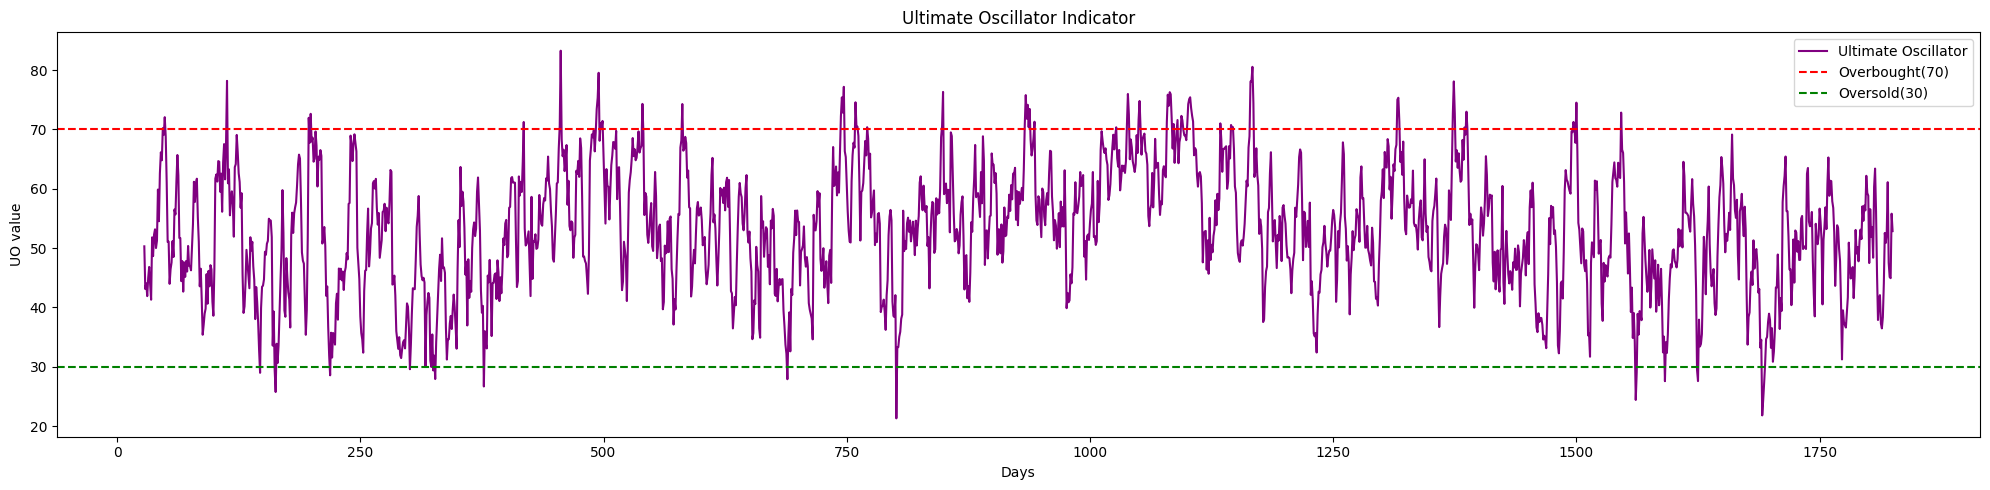

In [2533]:
#plot the UO Indicator
plt.figure(figsize=(20,5))
plt.plot(df.index, df['UO'], label='Ultimate Oscillator', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought(70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold(30)')
plt.title('Ultimate Oscillator Indicator')
plt.ylabel('UO value')
plt.xlabel('Days')
plt.legend()
plt.tight_layout()
plt.show()

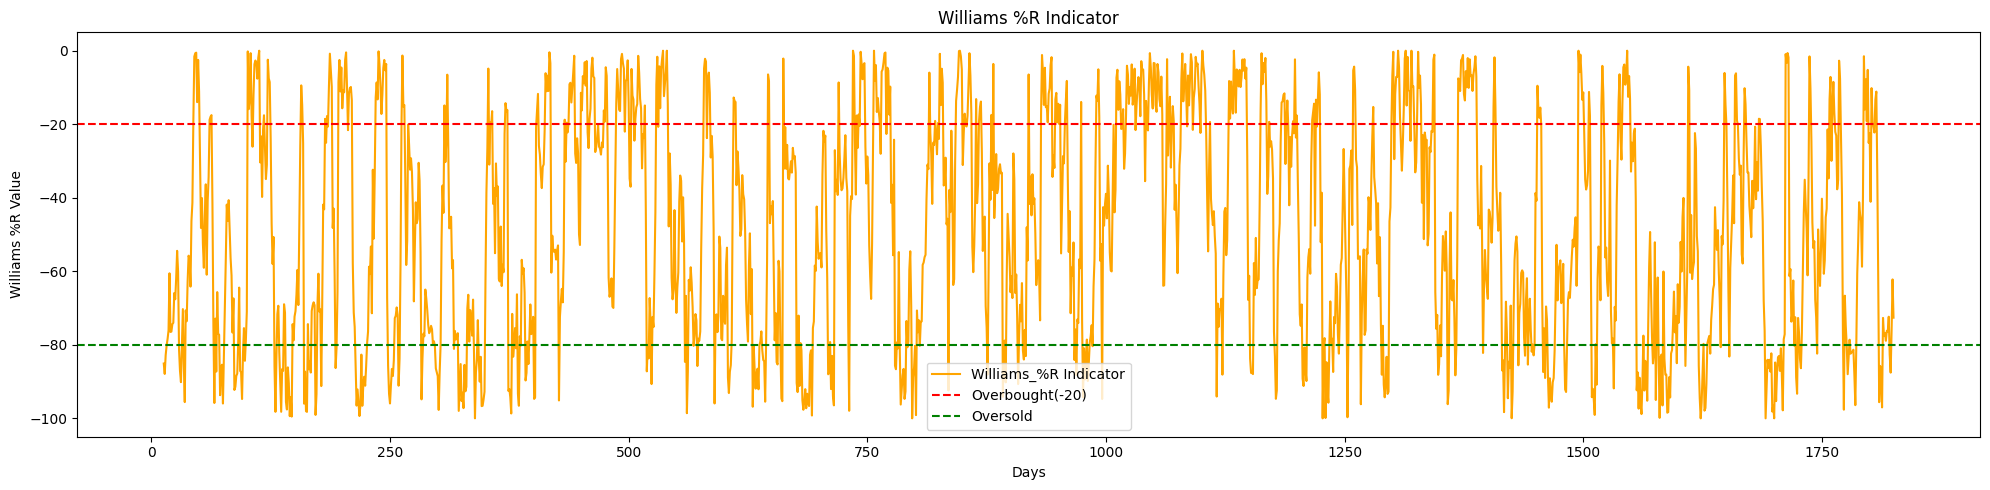

In [2534]:
#Implement WR Indicator
df['Williams_%R']=ta.momentum.WilliamsRIndicator(high=df['High'], low=df['Low'], close=df['Close'], lbp=14).williams_r()

#plot the williams %R Indicator
plt.figure(figsize=(20,5))
plt.plot(df.index, df['Williams_%R'], label='Williams_%R Indicator', color='orange')
plt.axhline(-20, label='Overbought(-20)', linestyle='--', color='red')
plt.axhline(-80, label='Oversold', linestyle='--', color='green')
plt.title('Williams %R Indicator')
plt.ylabel('Williams %R Value')
plt.xlabel('Days')
plt.legend()
plt.tight_layout()
plt.show()

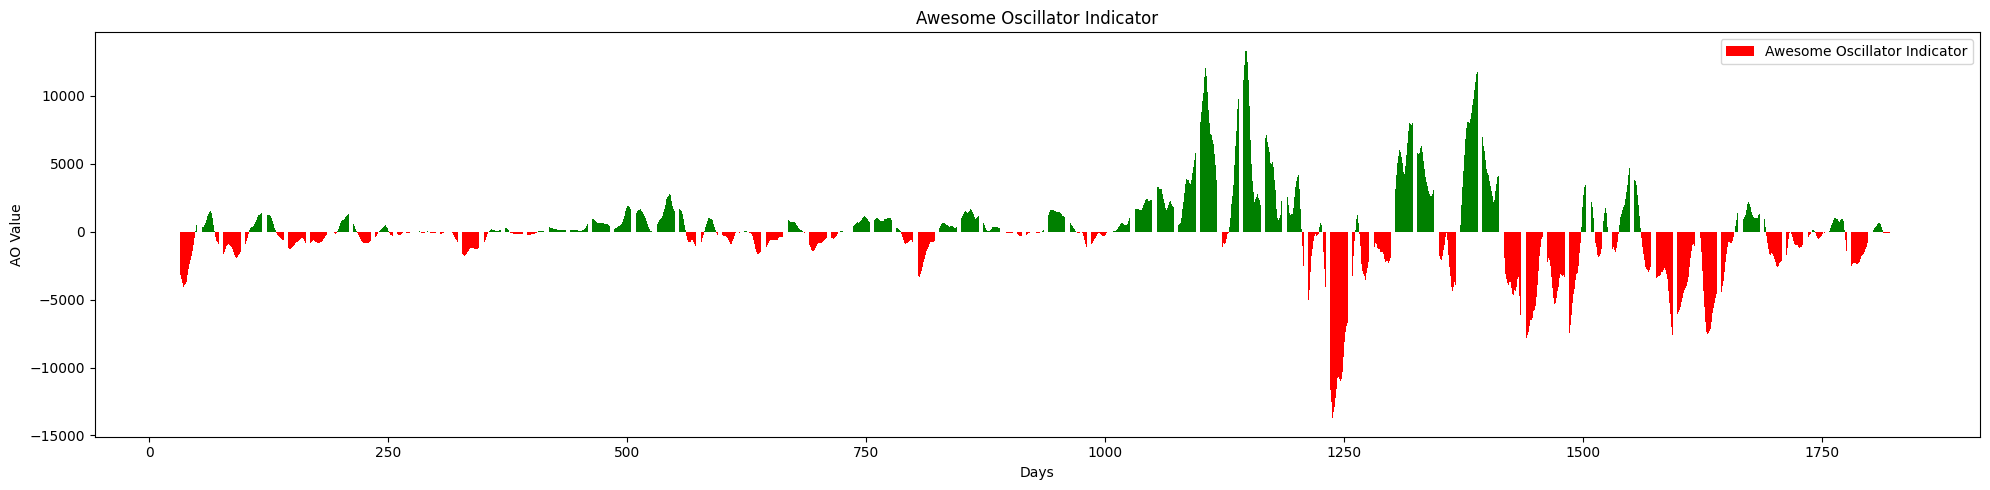

In [2535]:
#Implement Awesome Oscillator Indicator
df['AO']=ta.momentum.AwesomeOscillatorIndicator(high=df['High'], low=df['Low'], window1=5, window2=34).awesome_oscillator()

#plot the AO Indicator
plt.figure(figsize=(20,5))
plt.bar(df.index, df['AO'], label='Awesome Oscillator Indicator', color=(df['AO']>0).map({True:'green', False:'red'}))
plt.title('Awesome Oscillator Indicator')
plt.ylabel('AO Value')
plt.xlabel('Days')
plt.legend()
plt.tight_layout()
plt.show()

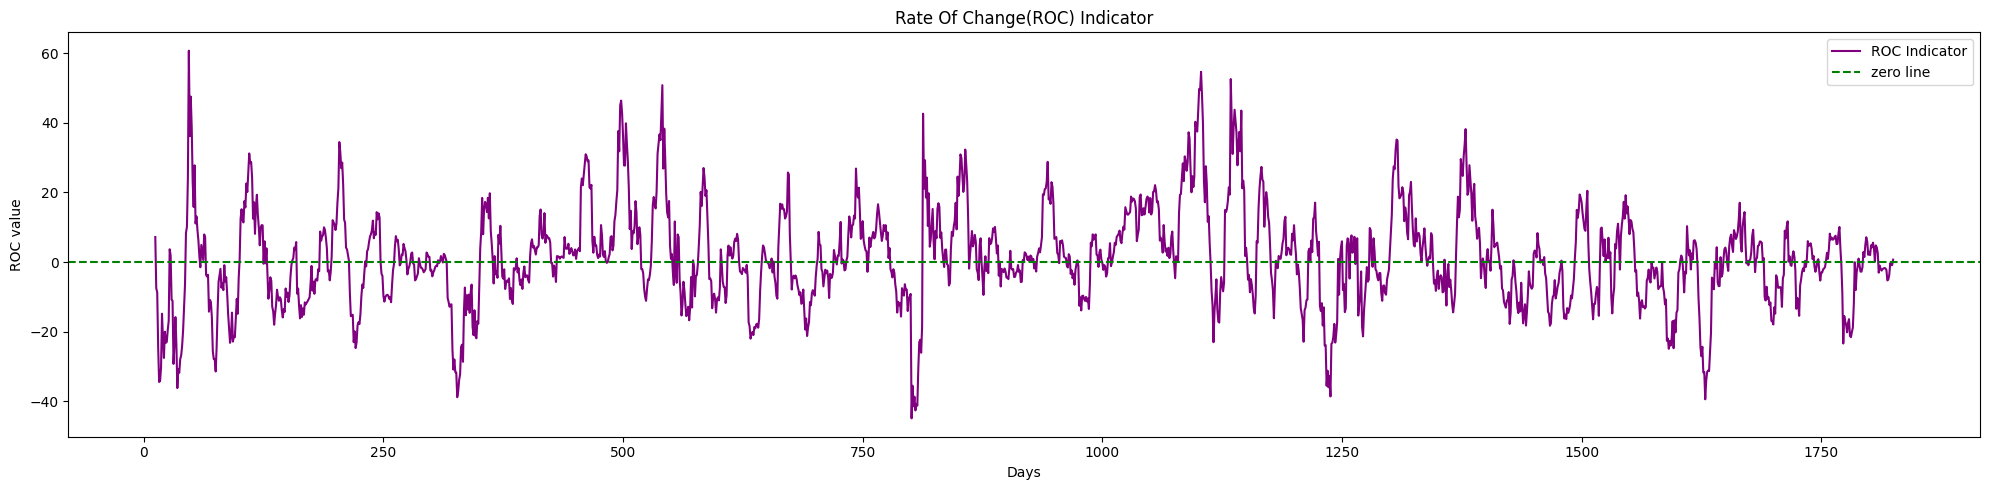

In [2536]:
#Implement Rate Of Change (ROC) Indicator
df['ROC']=ta.momentum.ROCIndicator(close=df['Close'], window=12).roc()

#plot the ROC Indicator
plt.figure(figsize=(20,5))
plt.plot(df.index, df['ROC'], label='ROC Indicator', color='purple')
plt.axhline(0, color='green', linestyle='--', label='zero line')
plt.title('Rate Of Change(ROC) Indicator')
plt.ylabel('ROC value')
plt.xlabel('Days')
plt.legend()
plt.tight_layout()
plt.show()

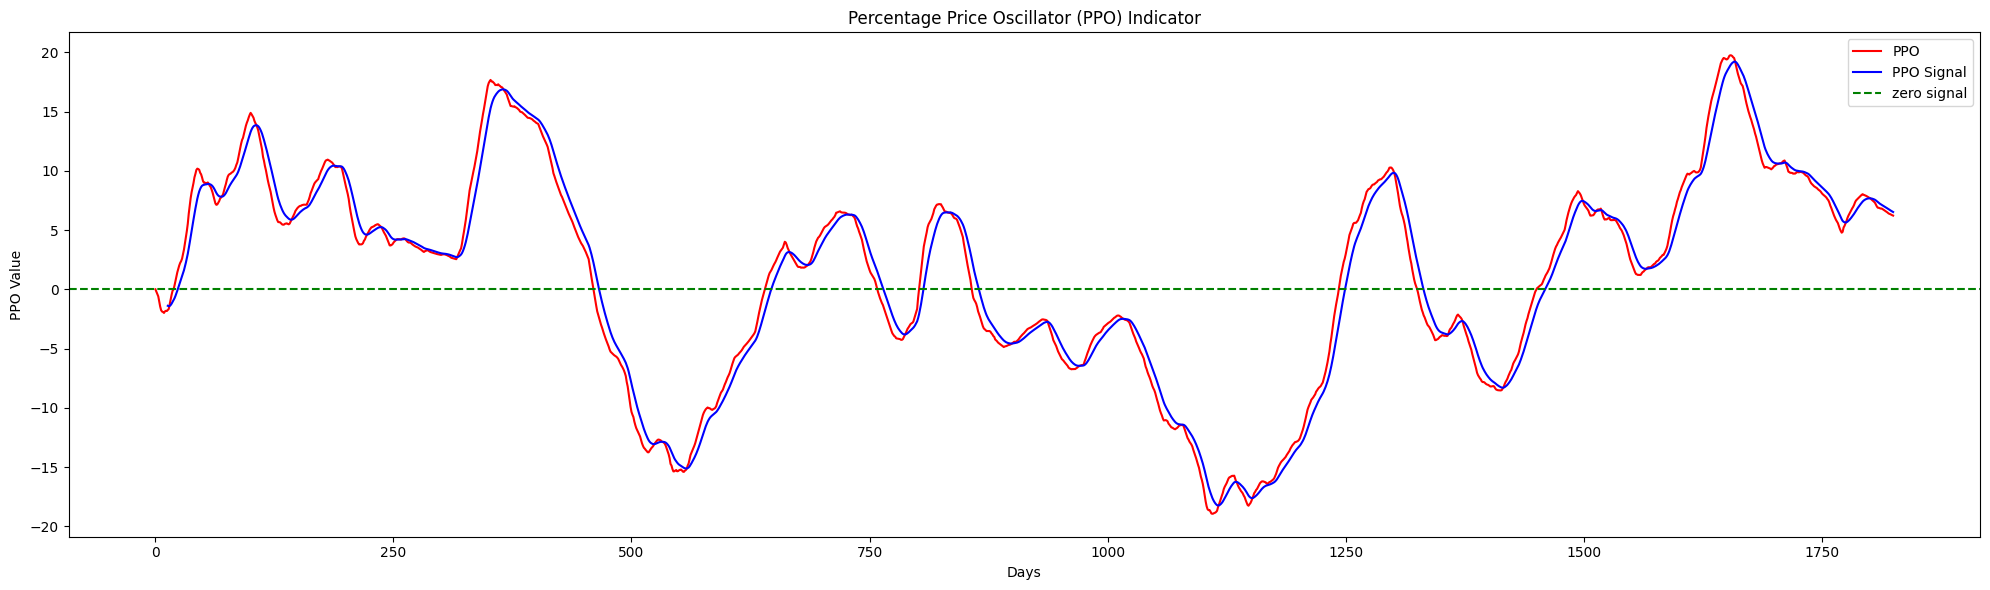

In [2537]:
#Implement Percentage Price Oscillator
def ema(series, window):
    return series.ewm(span=window, adjust=False).mean()

# Calculate the Fast and Slow EMAs
df['EMA_Fast'] = ema(df['Close'], window=50)
df['EMA_Slow'] = ema(df['Close'], window=100)
df['PPO']=((df['EMA_Slow']-df['EMA_Fast'])/df['EMA_Fast'])*100
df['PPO_Signal']=ta.trend.EMAIndicator(df['PPO']).ema_indicator()
#plot the PPO Indicator
plt.figure(figsize=(20,6))
plt.plot(df.index, df['PPO'], label='PPO', color='red')
plt.plot(df.index, df['PPO_Signal'], label='PPO Signal', color='blue')
plt.axhline(0, color='green', linestyle='--', label='zero signal')
plt.title('Percentage Price Oscillator (PPO) Indicator')
plt.ylabel('PPO Value')
plt.xlabel('Days')
plt.legend()
plt.tight_layout()
plt.show()
df=df.drop('EMA_Fast',axis=1)
df=df.drop('EMA_Slow',axis=1)
df=df.drop('PPO',axis=1)

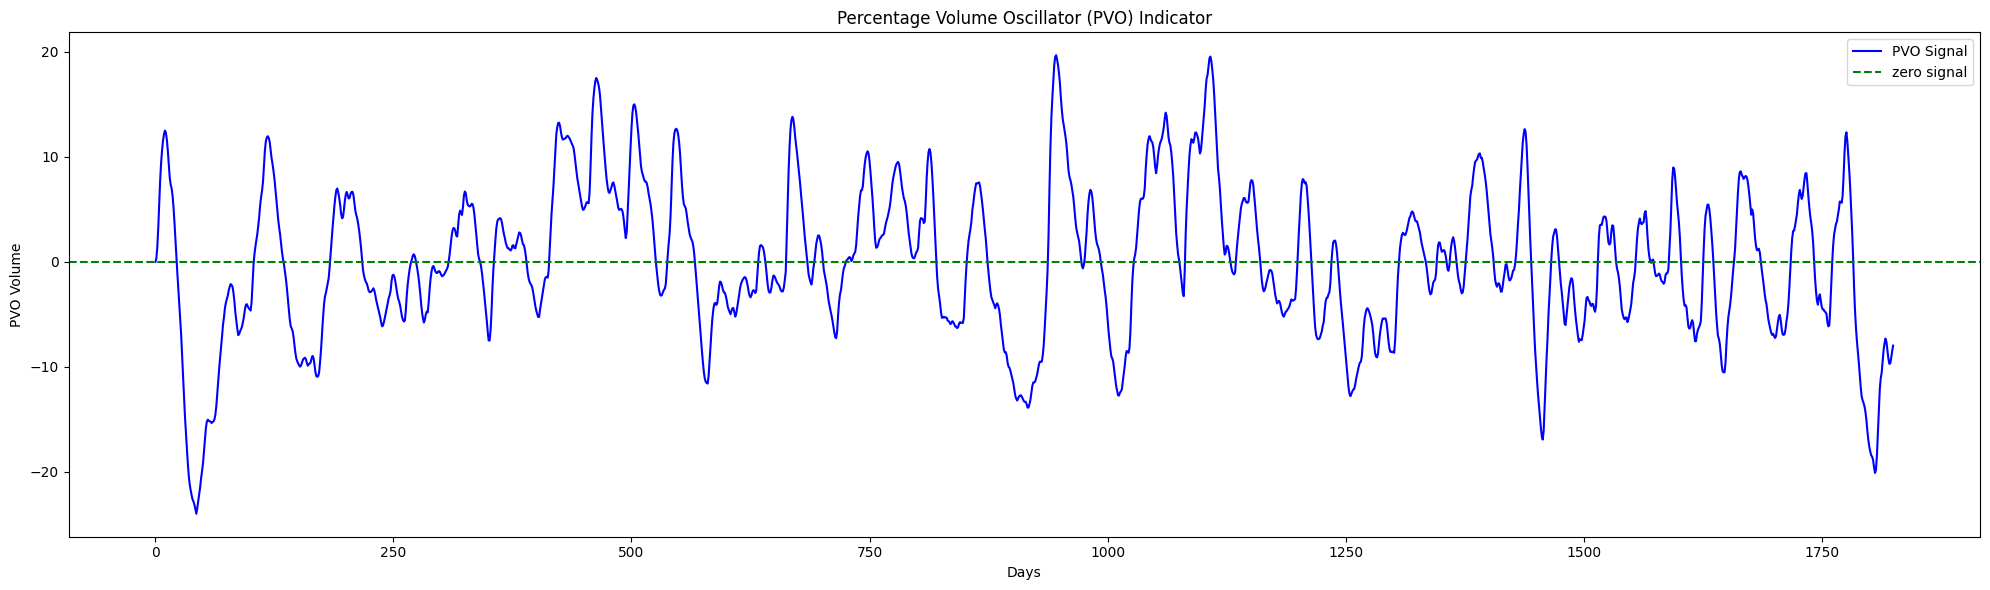

In [2538]:
#Implementation of Percentage Volume Oscillator Indicator
def ema(series, window):
    return series.ewm(span=window, adjust=False).mean()
df['EMA_Short'] = ema(df['Volume'], window=12)  # Short EMA (12 periods)
df['EMA_Long'] = ema(df['Volume'], window=26)   # Long EMA (26 periods)
df['PVO'] = ((df['EMA_Short'] - df['EMA_Long']) / df['EMA_Long']) * 100
df['PVO_Signal'] = ema(df['PVO'], window=9)
#plot the PVO Indicator
plt.figure(figsize=(20,6))
plt.plot(df.index, df['PVO_Signal'], label='PVO Signal', color='blue')
plt.axhline(0, color='green', linestyle='--', label='zero signal')
plt.title('Percentage Volume Oscillator (PVO) Indicator')
plt.ylabel('PVO Volume')
plt.xlabel('Days')
plt.legend()
plt.tight_layout()
plt.show()
df = df.drop(['EMA_Short', 'EMA_Long','PVO'], axis=1)

<Axes: >

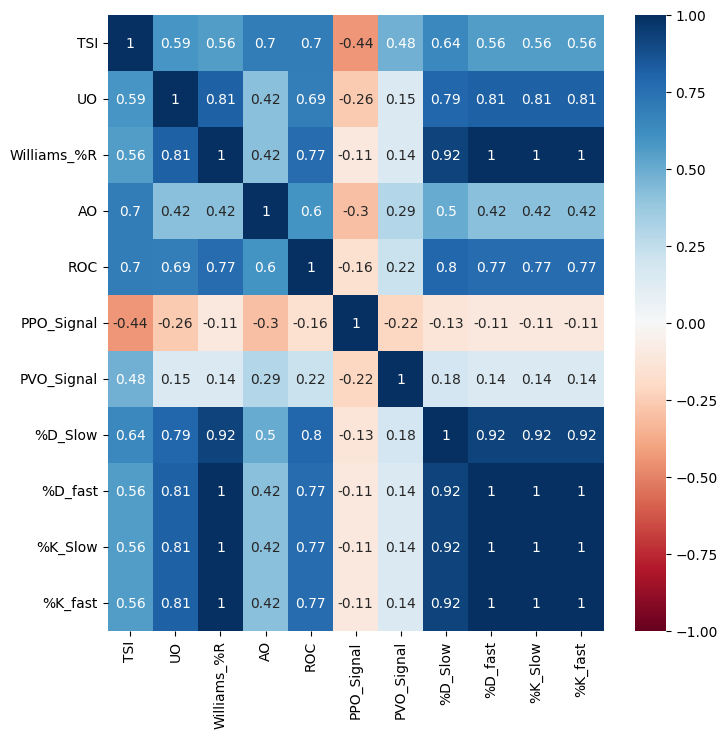

In [2539]:
import seaborn as sns
dataframe = df[['TSI','UO','Williams_%R','AO','ROC','PPO_Signal','PVO_Signal','%D_Slow','%D_fast','%K_Slow','%K_fast']]
corr = dataframe.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cmap='RdBu', vmin=-1,vmax = 1, annot=True)

In [2540]:
print(f'{df.shape[1]}')
#Dropping one of highly pairwise correlated features
upper_tri = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
# Drop the highly correlated features
df = df.drop(columns=to_drop)
print(f'{df.shape[1]}')

30
25


In [2541]:
                                        #Volume Indicator

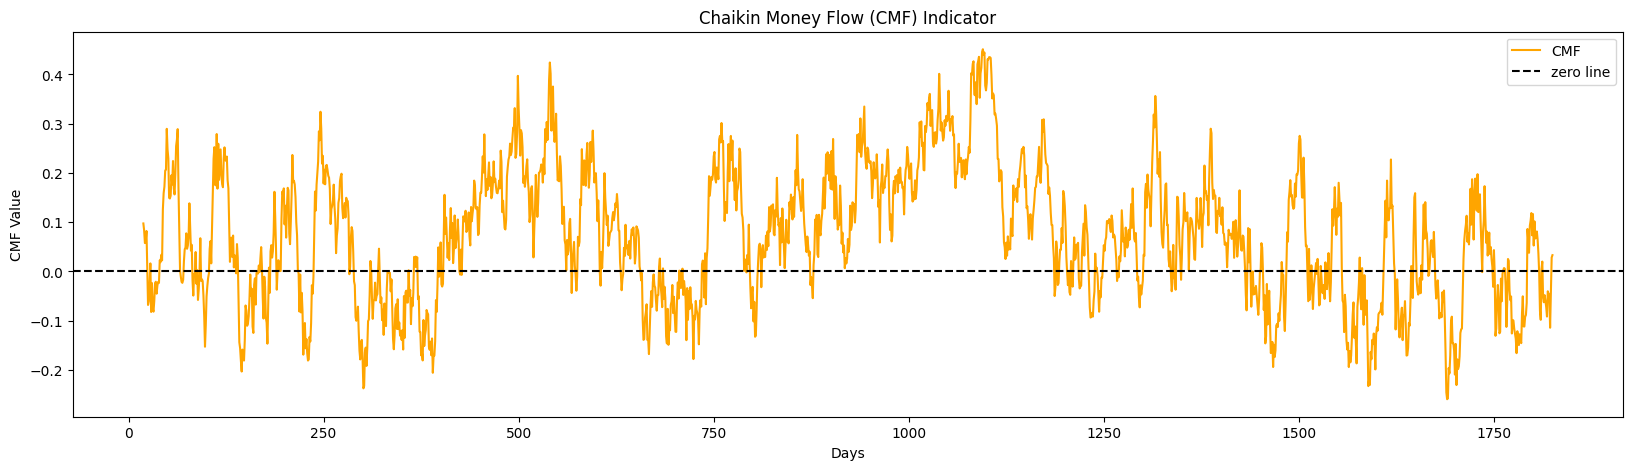

In [2542]:
#Implementation of Chaikin Money Flow Indicator
df['CMF']=ta.volume.ChaikinMoneyFlowIndicator(high=df['High'], low=df['Low'], close=df['Close'], volume=df['Volume'], window=20).chaikin_money_flow()

#plot the CMF Indicator
plt.figure(figsize=(20,5))
plt.plot(df.index, df['CMF'], label='CMF', color='orange')
plt.axhline(0, color='black', linestyle='--', label='zero line')
plt.title('Chaikin Money Flow (CMF) Indicator')
plt.ylabel('CMF Value')
plt.xlabel('Days')
plt.legend()
plt.show()

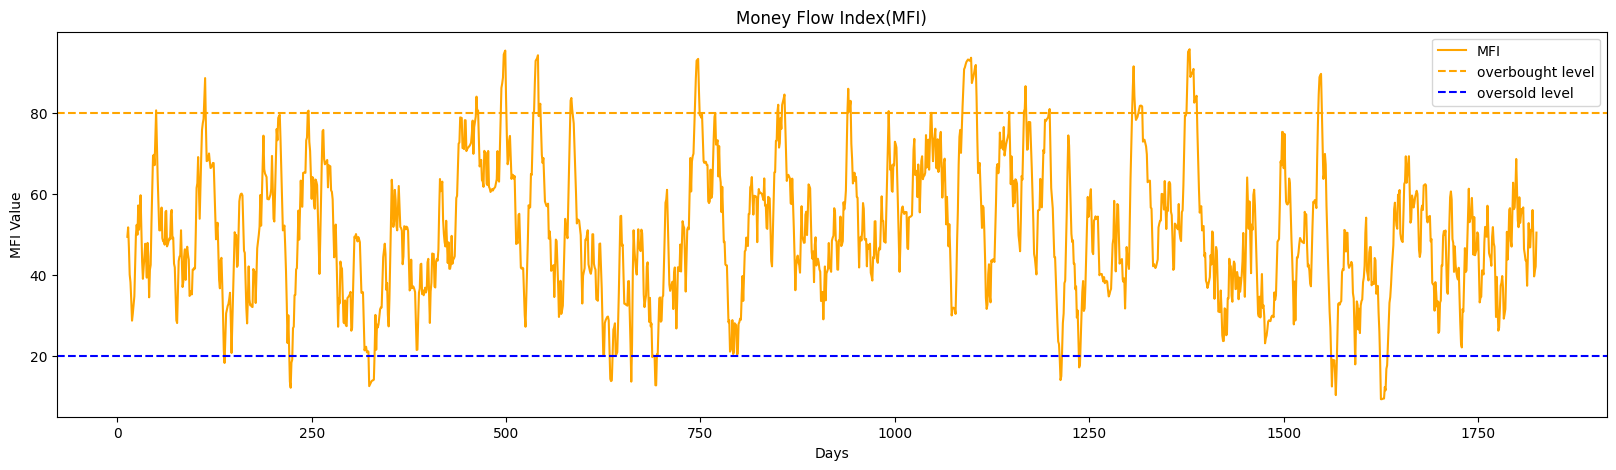

In [2543]:
#implementation of Money Flow Index(MFI) indicator
df['MFI']=ta.volume.MFIIndicator(high=df['High'],low=df['Low'],close=df['Close'],volume=df['Volume'],window=14).money_flow_index()
plt.figure(figsize=(20,5))
plt.plot(df.index, df['MFI'], label='MFI', color='orange')
plt.axhline(80, color='orange', linestyle='--', label='overbought level')
plt.axhline(20, color='blue', linestyle='--',label='oversold level')
plt.title('Money Flow Index(MFI)')
plt.ylabel('MFI Value')
plt.xlabel('Days')
plt.legend()
plt.show()

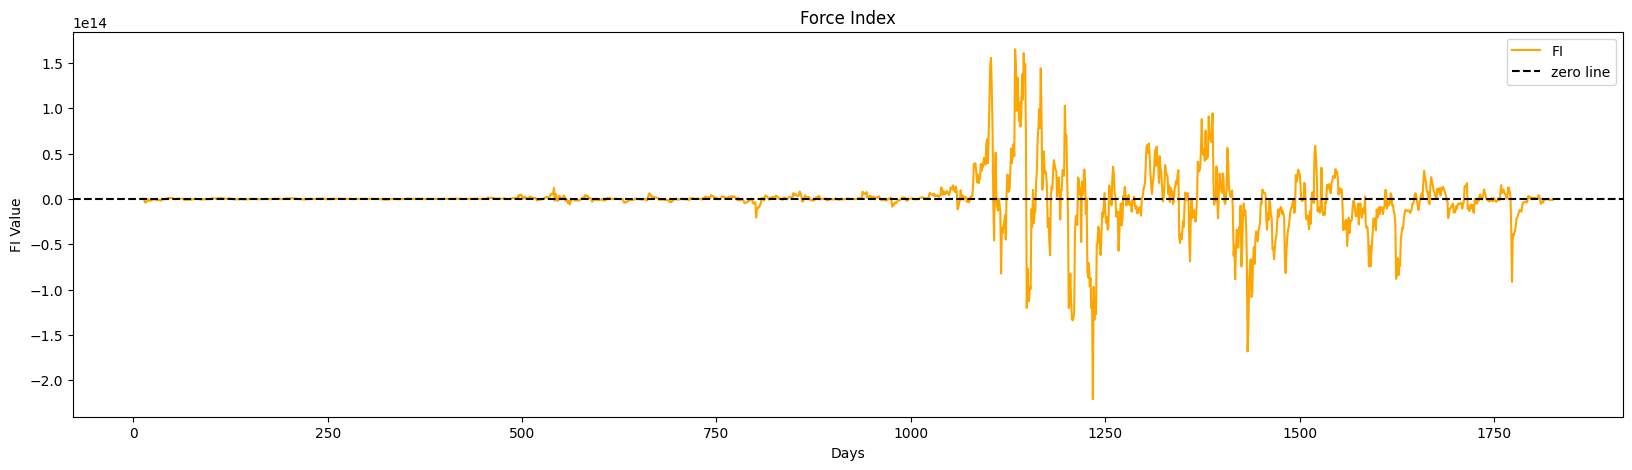

In [2544]:
#implementation of Force Index(FI) indicator
df['FI']=ta.volume.ForceIndexIndicator(close=df['Close'], volume=df['Volume'],window=13).force_index()
plt.figure(figsize=(20,5))
plt.plot(df.index, df['FI'], label='FI', color='orange')
plt.title('Force Index Indicator')
plt.axhline(0, color='black', linestyle='--',label='zero line')
plt.title('Force Index')
plt.ylabel('FI Value')
plt.xlabel('Days')
plt.legend()
plt.show()

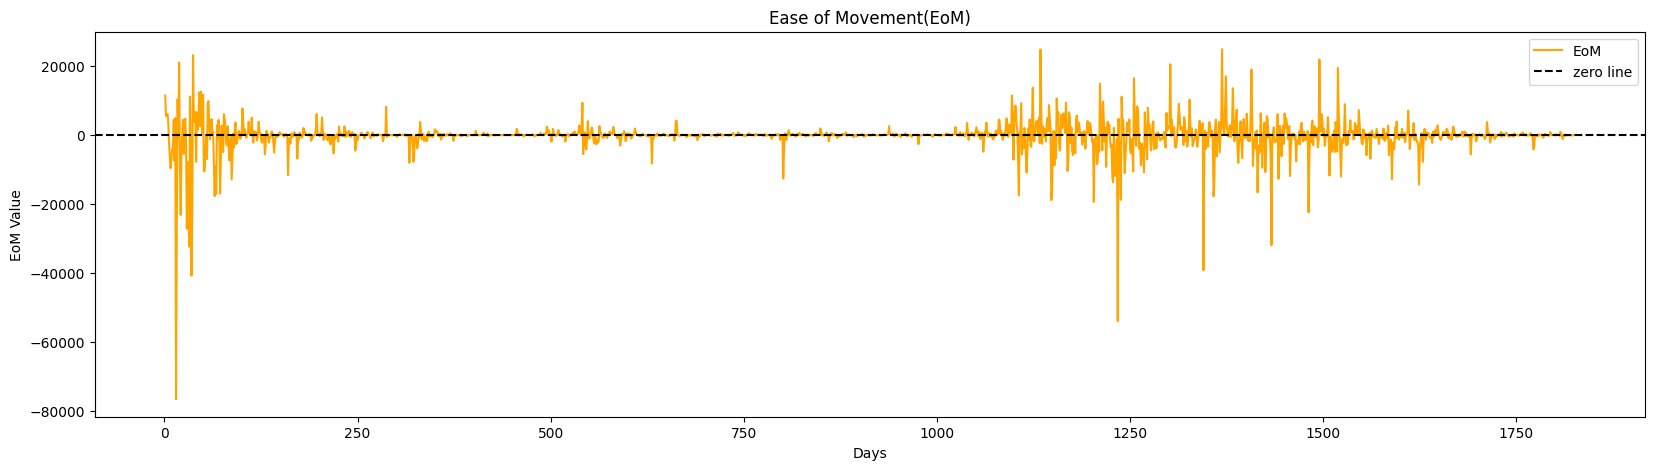

In [2545]:
#implementation of Ease of Movement(EoM,EMV) indicator
df['EoM']=ta.volume.EaseOfMovementIndicator(high=df['High'],low=df['Low'],volume=df['Volume'],window=14).ease_of_movement()
plt.figure(figsize=(20,5))
plt.plot(df.index, df['EoM'], label='EoM', color='orange')
plt.axhline(0, color='black', linestyle='--', label='zero line')
plt.title('Ease of Movement(EoM)')
plt.ylabel('EoM Value')
plt.xlabel('Days')
plt.legend()
plt.show()

<Axes: >

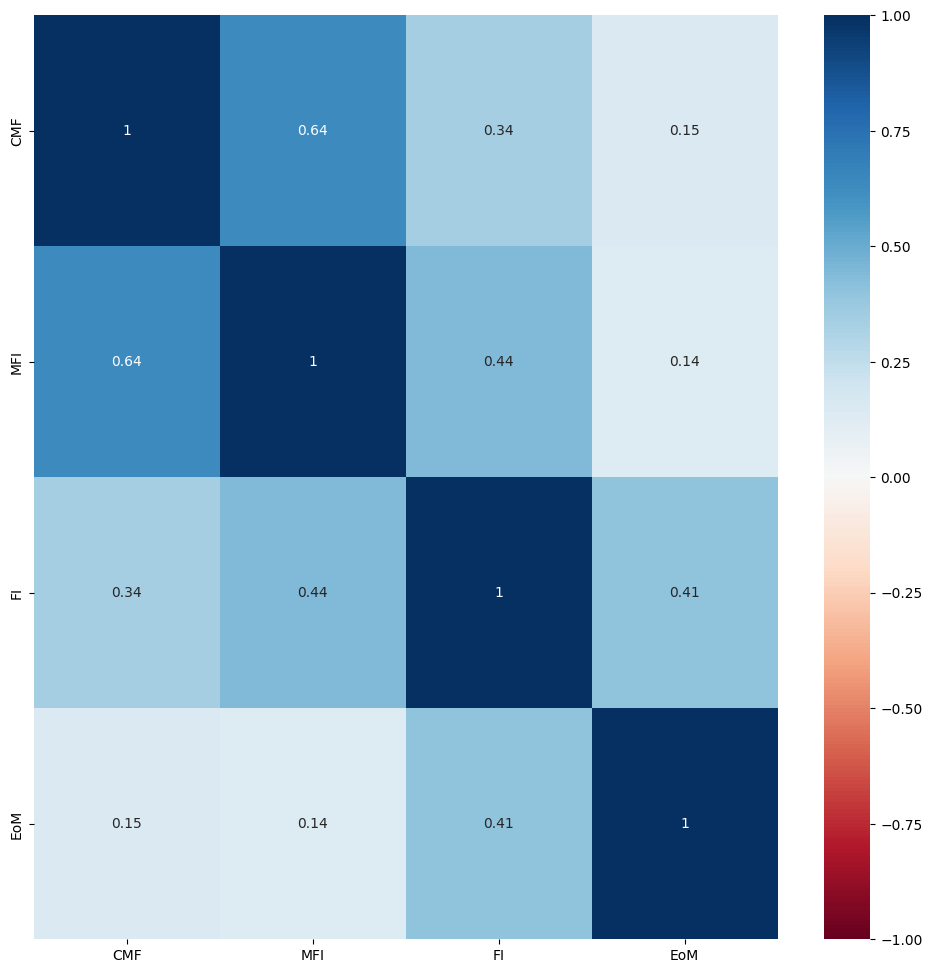

In [2546]:
import seaborn as sns
dataframe = df[['CMF','MFI','FI','EoM']]
corr = dataframe.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, cmap='RdBu', vmin=-1,vmax = 1, annot=True)

In [2547]:
print(f'{df.shape[1]}')
#Dropping one of highly pairwise correlated features
upper_tri = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.75)]
# Drop the highly correlated features
df = df.drop(columns=to_drop)
print(f'{df.shape[1]}')

29
29


In [2548]:
                                              #Volatility Indicators

In [2549]:

import mplfinance as mpf


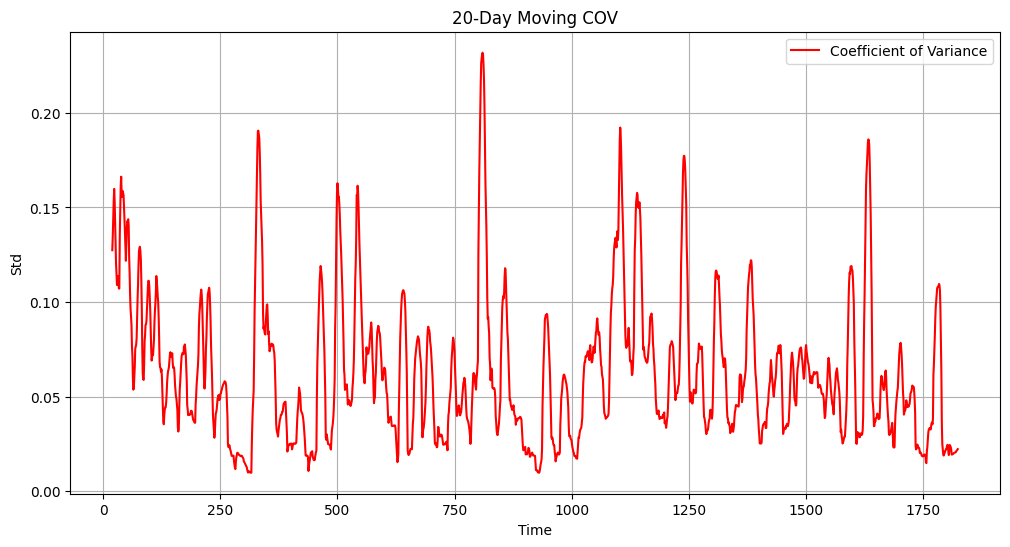

In [2550]:
# Calculate the 20-day moving standard deviation

df['Std_20'] = df['Close'].rolling(window=20).std()
df['Mean_20']=df['Close'].rolling(window=20).mean()
df['COV']=df['Std_20']/df['Mean_20']
# Plotting the 'Close' column and 'moving_std_20'
plt.figure(figsize=(12, 6))  # Optional: to specify figure size

# Plot the 20-day moving standard deviation
plt.plot(df['COV'], linestyle='-', color='r', label='Coefficient of Variance')

# Adding labels and title
plt.title('20-Day Moving COV')
plt.xlabel('Time')
plt.ylabel('Std')

# Optional: Adding grid and legend
plt.grid(True)
plt.legend()

# Display the plot
plt.show()
df=df.drop(['Std_20','Mean_20'],axis=1)

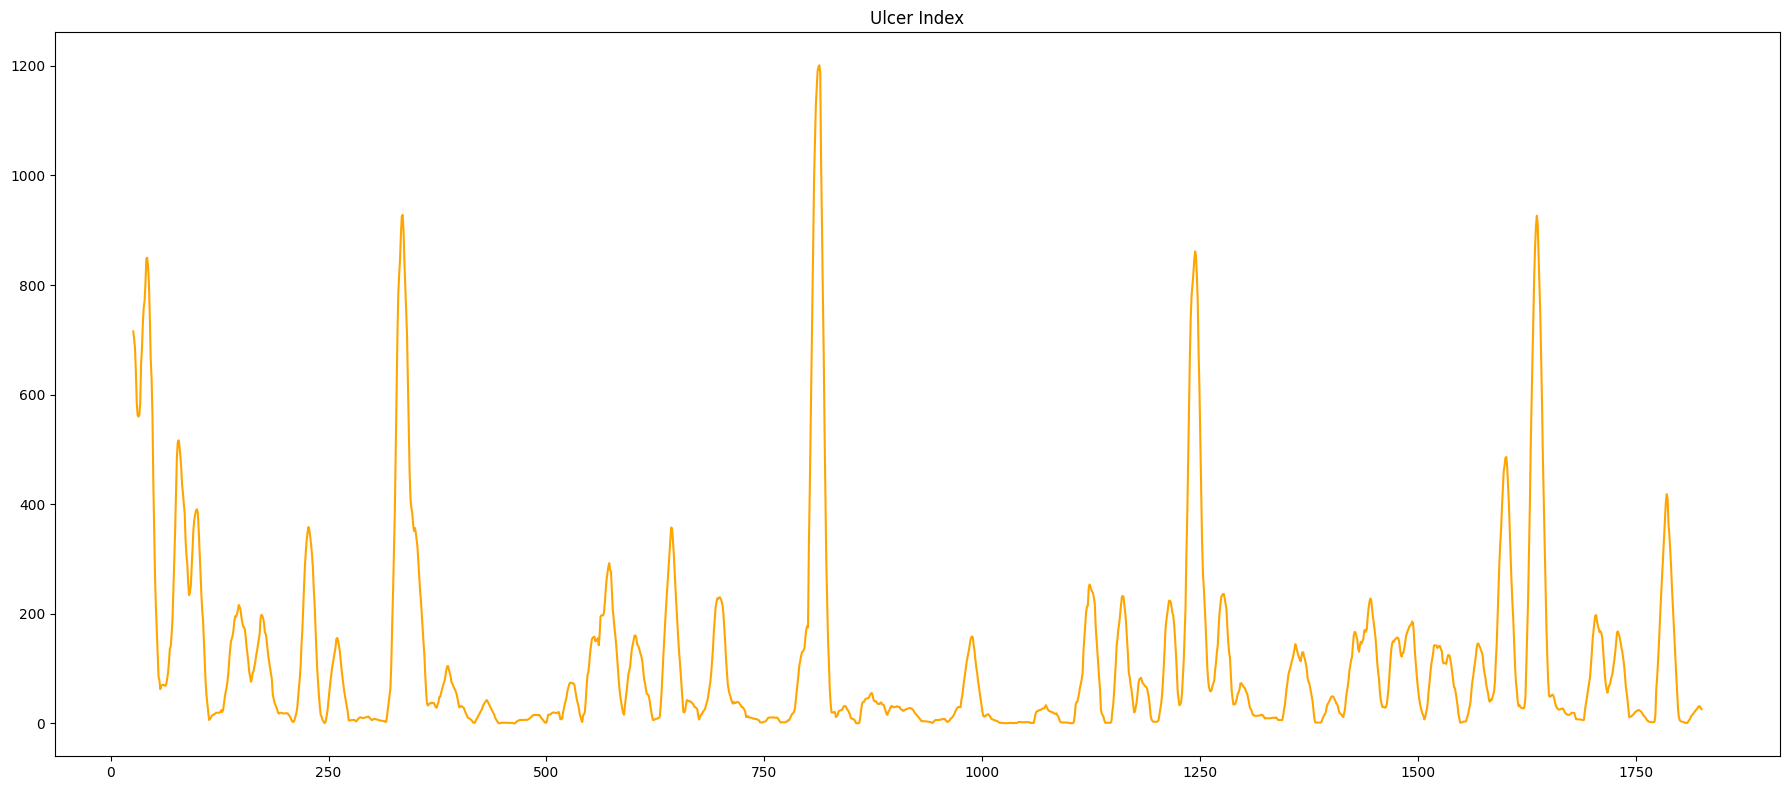

In [2551]:
# Ulcer Index
df['Drawdown_squared'] =(((df['Close']-df['Close'].rolling(14).max())*100)/df['Close'].rolling(14).max())**2
df['Ulcer_Index']=df['Drawdown_squared'].rolling(14).mean()
df=df.drop('Drawdown_squared',axis=1)
plt.figure(figsize=(18,8))
plt.plot(df.index, df['Ulcer_Index'], label='Ulcer Index', color='orange')

plt.title('Ulcer Index')
plt.tight_layout()
plt.show()

<Axes: >

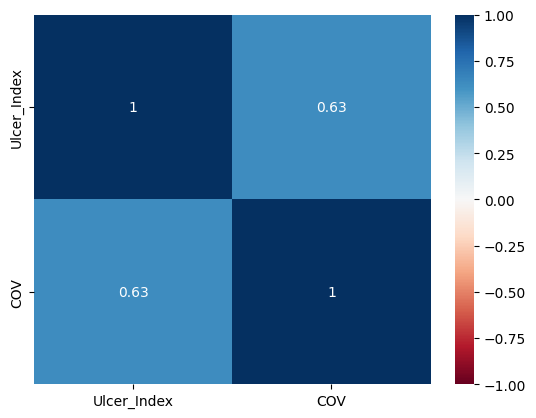

In [2552]:
import seaborn as sns
dataframe = df[['Ulcer_Index','COV']]
corr = dataframe.corr()
sns.heatmap(corr, cmap='RdBu', vmin=-1,vmax = 1, annot=True)


In [2553]:
print(f'{df.shape[1]}')
#Dropping one of highly pairwise correlated features
upper_tri = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
# Drop the highly correlated features
df = df.drop(columns=to_drop)
print(f'{df.shape[1]}')

31
31


In [2554]:
df['Returns']=(df['Close']-df['Close'].shift(1))/df['Close'].shift(1)
df['Log_Returns'] = np.log(df['Close'] / df['Close'].shift(1))
df


Start         End          Open          High           Low  \
0     2018-01-01  2018-01-02  14046.002764  14521.965544  12980.811131   
1     2018-01-02  2018-01-03  13644.693035  15468.208138  13195.873515   
2     2018-01-03  2018-01-04  14895.275367  15646.498638  14470.737671   
3     2018-01-04  2018-01-05  15168.972365  16708.709267  14286.669853   
4     2018-01-05  2018-01-06  15197.764745  17161.635004  14878.048174   
...          ...         ...           ...           ...           ...   
1821  2022-12-27  2022-12-28  16919.823027  16963.002980  16631.430000   
1822  2022-12-28  2022-12-29  16706.249402  16762.014600  16488.762900   
1823  2022-12-29  2022-12-30  16547.534921  16655.070278  16503.195500   
1824  2022-12-30  2022-12-31  16636.993115  16639.843547  16379.532500   
1825  2022-12-31  2023-01-01  16608.070868  16632.899700  16495.873732   

             Close        Volume    Market Cap     RSI_20        MACD  ...  \
0     13577.188555  9.527935e+09  2.292229e+11        NaN         NaN  ...   
1     14938.176676  1.151926e+10  2.345984e+11        NaN         NaN  ...   
2     15079.152185  1.548623e+10  2.538832e+11        NaN         NaN  ...   
3     15163.898948  1.785376e+10  2.510367e+11        NaN         NaN  ...   
4     16989.161482  1.960998e+10  2.718434e+11        NaN         NaN  ...   
...            ...           ...           ...        ...         ...  ...   
1821  16706.459710  3.144405e+10  3.229231e+11  45.178431 -233.177807  ...   
1822  16549.983266  3.860298e+10  3.197136e+11  43.625623 -238.880209  ...   
1823  16641.444864  4.178537e+10  3.188295e+11  44.793094 -237.988282  ...   
1824  16603.751953  3.645157e+10  3.180110e+11  44.394263 -237.920388  ...   
1825  16538.347900  3.406534e+10  3.183907e+11  43.683836 -239.942940  ...   

      PPO_Signal  PVO_Signal       CMF        MFI            FI           EoM  \
0            NaN    0.000000       NaN        NaN           NaN           NaN   
1            NaN    0.328362       NaN        NaN           NaN  11454.176428   
2            NaN    1.446065       NaN        NaN           NaN   5516.394239   
3            NaN    3.261809       NaN        NaN           NaN   5956.437352   
4            NaN    5.542940       NaN        NaN           NaN   6080.471607   
...          ...         ...       ...        ...           ...           ...   
1821    6.721574   -9.704777 -0.046938  49.113864 -8.871320e+11    -64.353555   
1822    6.671191   -9.672358 -0.114404  39.681165 -1.623321e+12   -121.628497   
1823    6.621677   -9.125367 -0.038362  41.079190 -8.454530e+11    -16.812342   
1824    6.573250   -8.508915  0.028189  42.108759 -9.209548e+11    -49.592561   
1825    6.526552   -7.969816  0.032988  50.467134 -1.107677e+12     22.002253   

           COV  Ulcer_Index   Returns  Log_Returns  
0          NaN          NaN       NaN          NaN  
1          NaN          NaN  0.100241     0.095529  
2          NaN          NaN  0.009437     0.009393  
3          NaN          NaN  0.005620     0.005604  
4          NaN          NaN  0.120369     0.113658  
...        ...          ...       ...          ...  
1821  0.020743    29.949294 -0.011975    -0.012048  
1822  0.021237    31.430030 -0.009366    -0.009410  
1823  0.021531    31.132325  0.005526     0.005511  
1824  0.021834    28.168637 -0.002265    -0.002268  
1825  0.022239    26.196880 -0.003939    -0.003947  

[1826 rows x 33 columns]

0.001041938050100515

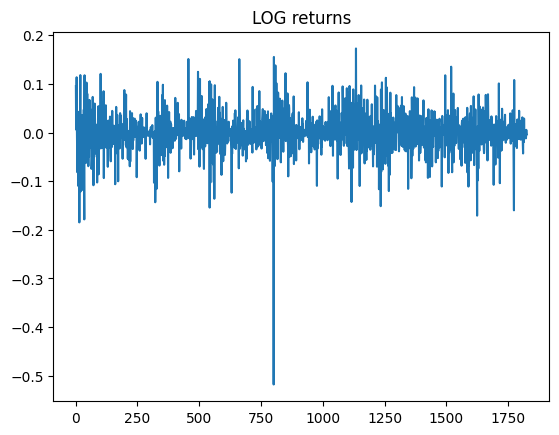

In [2555]:


df['Log_Returns'].plot(title='LOG returns')
df['Log_Returns'].dropna(inplace=True)
df['Log_Returns'].describe()
df['Log_Returns'].median()



Text(0, 0.5, 'Frequency')

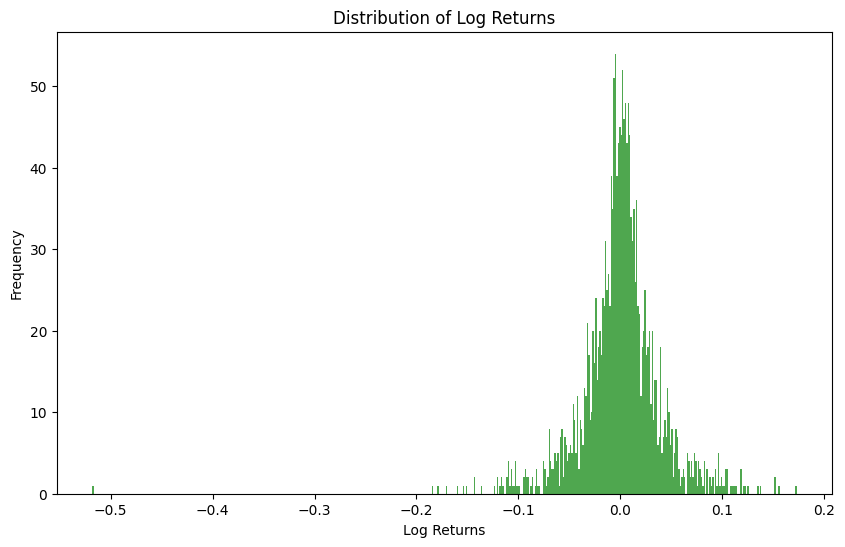

In [2556]:
# Distribution of Log Returns
# We are using log returns as they are more normally distributed than simple intraday returns.
#Even though log returns follow normal distribution for large dataset , they follow student t's distribution more closely for smaller samples as we will show later
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.title('Distribution of Log Returns')
plt.hist(df['Log_Returns'],bins=500, color='green', alpha=0.69)
plt.xlabel('Log Returns')
plt.ylabel('Frequency')

# New Section

In [2557]:
print(f'{df.shape[1]}')
df

33


Start         End          Open          High           Low  \
0     2018-01-01  2018-01-02  14046.002764  14521.965544  12980.811131   
1     2018-01-02  2018-01-03  13644.693035  15468.208138  13195.873515   
2     2018-01-03  2018-01-04  14895.275367  15646.498638  14470.737671   
3     2018-01-04  2018-01-05  15168.972365  16708.709267  14286.669853   
4     2018-01-05  2018-01-06  15197.764745  17161.635004  14878.048174   
...          ...         ...           ...           ...           ...   
1821  2022-12-27  2022-12-28  16919.823027  16963.002980  16631.430000   
1822  2022-12-28  2022-12-29  16706.249402  16762.014600  16488.762900   
1823  2022-12-29  2022-12-30  16547.534921  16655.070278  16503.195500   
1824  2022-12-30  2022-12-31  16636.993115  16639.843547  16379.532500   
1825  2022-12-31  2023-01-01  16608.070868  16632.899700  16495.873732   

             Close        Volume    Market Cap     RSI_20        MACD  ...  \
0     13577.188555  9.527935e+09  2.292229e+11        NaN         NaN  ...   
1     14938.176676  1.151926e+10  2.345984e+11        NaN         NaN  ...   
2     15079.152185  1.548623e+10  2.538832e+11        NaN         NaN  ...   
3     15163.898948  1.785376e+10  2.510367e+11        NaN         NaN  ...   
4     16989.161482  1.960998e+10  2.718434e+11        NaN         NaN  ...   
...            ...           ...           ...        ...         ...  ...   
1821  16706.459710  3.144405e+10  3.229231e+11  45.178431 -233.177807  ...   
1822  16549.983266  3.860298e+10  3.197136e+11  43.625623 -238.880209  ...   
1823  16641.444864  4.178537e+10  3.188295e+11  44.793094 -237.988282  ...   
1824  16603.751953  3.645157e+10  3.180110e+11  44.394263 -237.920388  ...   
1825  16538.347900  3.406534e+10  3.183907e+11  43.683836 -239.942940  ...   

      PPO_Signal  PVO_Signal       CMF        MFI            FI           EoM  \
0            NaN    0.000000       NaN        NaN           NaN           NaN   
1            NaN    0.328362       NaN        NaN           NaN  11454.176428   
2            NaN    1.446065       NaN        NaN           NaN   5516.394239   
3            NaN    3.261809       NaN        NaN           NaN   5956.437352   
4            NaN    5.542940       NaN        NaN           NaN   6080.471607   
...          ...         ...       ...        ...           ...           ...   
1821    6.721574   -9.704777 -0.046938  49.113864 -8.871320e+11    -64.353555   
1822    6.671191   -9.672358 -0.114404  39.681165 -1.623321e+12   -121.628497   
1823    6.621677   -9.125367 -0.038362  41.079190 -8.454530e+11    -16.812342   
1824    6.573250   -8.508915  0.028189  42.108759 -9.209548e+11    -49.592561   
1825    6.526552   -7.969816  0.032988  50.467134 -1.107677e+12     22.002253   

           COV  Ulcer_Index   Returns  Log_Returns  
0          NaN          NaN       NaN          NaN  
1          NaN          NaN  0.100241     0.095529  
2          NaN          NaN  0.009437     0.009393  
3          NaN          NaN  0.005620     0.005604  
4          NaN          NaN  0.120369     0.113658  
...        ...          ...       ...          ...  
1821  0.020743    29.949294 -0.011975    -0.012048  
1822  0.021237    31.430030 -0.009366    -0.009410  
1823  0.021531    31.132325  0.005526     0.005511  
1824  0.021834    28.168637 -0.002265    -0.002268  
1825  0.022239    26.196880 -0.003939    -0.003947  

[1826 rows x 33 columns]

In [2558]:
df['Log_Returns']=df['Log_Returns'].shift(-1)
df['Trade_Calls']=df['Log_Returns'].apply(lambda x:1 if x>0 else 0)
df = df.fillna(0) #since xgboost can deal with missing values if they are input as 0 , this is an advantage of using this approach
log_returns = df['Log_Returns'].copy()
df=df.drop('Log_Returns',axis=1)
df

Start         End          Open          High           Low  \
0     2018-01-01  2018-01-02  14046.002764  14521.965544  12980.811131   
1     2018-01-02  2018-01-03  13644.693035  15468.208138  13195.873515   
2     2018-01-03  2018-01-04  14895.275367  15646.498638  14470.737671   
3     2018-01-04  2018-01-05  15168.972365  16708.709267  14286.669853   
4     2018-01-05  2018-01-06  15197.764745  17161.635004  14878.048174   
...          ...         ...           ...           ...           ...   
1821  2022-12-27  2022-12-28  16919.823027  16963.002980  16631.430000   
1822  2022-12-28  2022-12-29  16706.249402  16762.014600  16488.762900   
1823  2022-12-29  2022-12-30  16547.534921  16655.070278  16503.195500   
1824  2022-12-30  2022-12-31  16636.993115  16639.843547  16379.532500   
1825  2022-12-31  2023-01-01  16608.070868  16632.899700  16495.873732   

             Close        Volume    Market Cap     RSI_20        MACD  ...  \
0     13577.188555  9.527935e+09  2.292229e+11   0.000000    0.000000  ...   
1     14938.176676  1.151926e+10  2.345984e+11   0.000000    0.000000  ...   
2     15079.152185  1.548623e+10  2.538832e+11   0.000000    0.000000  ...   
3     15163.898948  1.785376e+10  2.510367e+11   0.000000    0.000000  ...   
4     16989.161482  1.960998e+10  2.718434e+11   0.000000    0.000000  ...   
...            ...           ...           ...        ...         ...  ...   
1821  16706.459710  3.144405e+10  3.229231e+11  45.178431 -233.177807  ...   
1822  16549.983266  3.860298e+10  3.197136e+11  43.625623 -238.880209  ...   
1823  16641.444864  4.178537e+10  3.188295e+11  44.793094 -237.988282  ...   
1824  16603.751953  3.645157e+10  3.180110e+11  44.394263 -237.920388  ...   
1825  16538.347900  3.406534e+10  3.183907e+11  43.683836 -239.942940  ...   

      PPO_Signal  PVO_Signal       CMF        MFI            FI           EoM  \
0       0.000000    0.000000  0.000000   0.000000  0.000000e+00      0.000000   
1       0.000000    0.328362  0.000000   0.000000  0.000000e+00  11454.176428   
2       0.000000    1.446065  0.000000   0.000000  0.000000e+00   5516.394239   
3       0.000000    3.261809  0.000000   0.000000  0.000000e+00   5956.437352   
4       0.000000    5.542940  0.000000   0.000000  0.000000e+00   6080.471607   
...          ...         ...       ...        ...           ...           ...   
1821    6.721574   -9.704777 -0.046938  49.113864 -8.871320e+11    -64.353555   
1822    6.671191   -9.672358 -0.114404  39.681165 -1.623321e+12   -121.628497   
1823    6.621677   -9.125367 -0.038362  41.079190 -8.454530e+11    -16.812342   
1824    6.573250   -8.508915  0.028189  42.108759 -9.209548e+11    -49.592561   
1825    6.526552   -7.969816  0.032988  50.467134 -1.107677e+12     22.002253   

           COV  Ulcer_Index   Returns  Trade_Calls  
0     0.000000     0.000000  0.000000            1  
1     0.000000     0.000000  0.100241            1  
2     0.000000     0.000000  0.009437            1  
3     0.000000     0.000000  0.005620            1  
4     0.000000     0.000000  0.120369            1  
...        ...          ...       ...          ...  
1821  0.020743    29.949294 -0.011975            0  
1822  0.021237    31.430030 -0.009366            1  
1823  0.021531    31.132325  0.005526            0  
1824  0.021834    28.168637 -0.002265            0  
1825  0.022239    26.196880 -0.003939            0  

[1826 rows x 33 columns]

In [2559]:
print(len(log_returns))

1826


In [2560]:
df.dtypes.value_counts()

float64    30
object      2
int64       1
Name: count, dtype: int64

In [2561]:
df.columns

Index(['Start', 'End', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap',
       'RSI_20', 'MACD', 'MACD_Signal', 'MACD_diff', 'ADX', '-DI', 'CCI',
       'TRIX_30', 'Mass_Index', 'DPO', 'STC', 'TSI', 'UO', 'AO', 'ROC',
       'PPO_Signal', 'PVO_Signal', 'CMF', 'MFI', 'FI', 'EoM', 'COV',
       'Ulcer_Index', 'Returns', 'Trade_Calls'],
      dtype='object')

In [2562]:
columns_to_drop = ['Start','End','Market Cap','Open','High','Low','Returns','Close','Volume','MACD','MACD_Signal']
df=df.drop(columns=columns_to_drop)
X=df.drop('Trade_Calls',axis=1).copy()
Y=df['Trade_Calls'].copy()
print(X)
print(Y)

         RSI_20  MACD_diff        ADX        -DI        CCI   TRIX_30  \
0      0.000000   0.000000   0.000000   0.000000   0.000000  0.000000   
1      0.000000   0.000000   0.000000   0.000000   0.000000  0.000000   
2      0.000000   0.000000   0.000000   0.000000   0.000000  0.000000   
3      0.000000   0.000000   0.000000   0.000000   0.000000  0.000000   
4      0.000000   0.000000   0.000000   0.000000   0.000000  0.000000   
...         ...        ...        ...        ...        ...       ...   
1821  45.178431  26.107809  21.011390  29.183679 -57.918033 -0.213969   
1822  43.625623  16.324325  21.111523  29.991675 -90.506242 -0.209623   
1823  44.793094  13.773002  21.206649  29.388362 -84.327050 -0.205473   
1824  44.394263  11.072717  21.431082  30.016409 -92.842953 -0.201538   
1825  43.683836   7.240132  21.644293  29.445128 -85.380262 -0.197872   

      Mass_Index         DPO        STC       TSI  ...          AO       ROC  \
0       0.000000    0.000000   0.000000  0.

**THESE ARE THE FINAL SET OF INDICATORS THAT WE WILL USE FOR TRAINING THE BOOSTED TREE XGBOOST MODEL**

In [2563]:
df.columns

Index(['RSI_20', 'MACD_diff', 'ADX', '-DI', 'CCI', 'TRIX_30', 'Mass_Index',
       'DPO', 'STC', 'TSI', 'UO', 'AO', 'ROC', 'PPO_Signal', 'PVO_Signal',
       'CMF', 'MFI', 'FI', 'EoM', 'COV', 'Ulcer_Index', 'Trade_Calls'],
      dtype='object')

In [2564]:
df.shape

(1826, 22)

# New Section

In [2565]:
file_path='/content/drive/My Drive/bitcoin_usd_next.csv'
df2=pd.read_csv(file_path)
df2_inverted = df2.iloc[::-1]
df2_inverted = df2_inverted.reset_index(drop=True)
df2 =df2_inverted
df2

Start         End          Open          High           Low  \
0    2023-01-01  2023-01-02  16537.454200  16621.165100  16507.390600   
1    2023-01-02  2023-01-03  16617.254396  16758.525308  16560.090732   
2    2023-01-03  2023-01-04  16673.748747  16763.447292  16616.632381   
3    2023-01-04  2023-01-05  16674.508700  16973.381191  16658.433945   
4    2023-01-05  2023-01-06  16852.132786  16877.126600  16781.464800   
..          ...         ...           ...           ...           ...   
644  2024-10-06  2024-10-07  62000.060000  62915.020000  61839.920000   
645  2024-10-07  2024-10-08  62845.990000  64436.040000  62213.980000   
646  2024-10-08  2024-10-09  62319.440000  63130.040000  61912.010000   
647  2024-10-09  2024-10-10  62130.050000  62530.420000  60439.870000   
648  2024-10-10  2024-10-11  60603.900000  61300.020000  59017.000000   

            Close        Volume    Market Cap  
0    16607.069459  2.350878e+10  3.181669e+11  
1    16677.449944  2.485967e+10  3.207060e+11  
2    16675.909037  2.964833e+10  3.207174e+11  
3    16857.282709  3.938416e+10  3.233862e+11  
4    16828.846400  3.896006e+10  3.234474e+11  
..            ...           ...           ...  
644  62823.430000  7.363212e+10  1.230673e+12  
645  62300.750000  9.609529e+10  1.252777e+12  
646  62215.970000  1.072401e+11  1.233788e+12  
647  60647.990000  9.309215e+10  1.222680e+12  
648  60260.020000  9.341987e+10  1.197203e+12  

[649 rows x 8 columns]

**IMPLEMENTATION OF THE SHORTLISTED INDICATORS FOR THE BACKTESTING DATA 2022-CURRENT DATE**

In [2566]:
#Implementation of feature indicators
df2['RSI_20']=ta.momentum.RSIIndicator(close=df2['Close'],window=20).rsi()
macd=ta.trend.MACD(close=df2['Close'],window_slow=39,window_fast=19,window_sign=9)
df2['MACD']=macd.macd()
df2['MACD_Signal']=macd.macd_signal()
df2['MACD_diff']=macd.macd_diff()
adx_indicator=ta.trend.ADXIndicator(high=df2['High'],low=df2['Low'], close=df2['Close'],window=20)
df2['ADX']=adx_indicator.adx()
df2['-DI']=adx_indicator.adx_neg()
df2['CCI'] = ta.trend.CCIIndicator(high=df2['High'], low=df2['Low'], close=df2['Close'], window=20, constant=0.015).cci()
df2['TRIX_30']=ta.trend.TRIXIndicator(close=df2['Close'], window=30).trix()
df2['Mass_Index']=ta.trend.MassIndex(high=df2['High'], low=df2['Low'], window_fast=9, window_slow=25).mass_index()
df2['DPO']=ta.trend.DPOIndicator(close=df2['Close'], window=20).dpo()
kst=ta.trend.KSTIndicator(close=df2['Close'], roc1=10, roc2=15, roc3=20, roc4=30)
df2['STC']=ta.trend.STCIndicator(close=df2['Close'], window_slow=50, window_fast=23, cycle=10).stc()
slow_stochastic_oscillator = ta.momentum.StochasticOscillator(high=df2['High'], low=df2['Low'], close=df2['Close'], window=14, smooth_window=3)
df2['TSI']=ta.momentum.TSIIndicator(close=df2['Close'], window_slow=25, window_fast=13).tsi()
df2['UO']=ta.momentum.UltimateOscillator(high=df2['High'], low=df2['Low'], close=df2['Close'], window1=7, window2=14, window3=28).ultimate_oscillator()
df2['AO']=ta.momentum.AwesomeOscillatorIndicator(high=df2['High'], low=df2['Low'], window1=5, window2=34).awesome_oscillator()
df2['ROC']=ta.momentum.ROCIndicator(close=df2['Close'], window=12).roc()
def ema(series, window):
    return series.ewm(span=window, adjust=False).mean()
df2['EMA_Fast'] = ema(df2['Close'], window=50)
df2['EMA_Slow'] = ema(df2['Close'], window=100)
df2['PPO']=((df2['EMA_Slow']-df2['EMA_Fast'])/df2['EMA_Fast'])*100
df2['PPO_Signal']=ta.trend.EMAIndicator(df2['PPO']).ema_indicator()
df2=df2.drop('EMA_Fast',axis=1)
df2=df2.drop('EMA_Slow',axis=1)
df2=df2.drop('PPO',axis=1)
def ema(series, window):
    return series.ewm(span=window, adjust=False).mean()
df2['EMA_Short'] = ema(df2['Volume'], window=12)  # Short EMA (12 periods)
df2['EMA_Long'] = ema(df2['Volume'], window=26)   # Long EMA (26 periods)
df2['PVO'] = ((df2['EMA_Short'] - df2['EMA_Long']) / df2['EMA_Long']) * 100
df2['PVO_Signal'] = ema(df2['PVO'], window=9)
df2=df2.drop('EMA_Short',axis=1)
df2=df2.drop('EMA_Long',axis=1)
df2=df2.drop('PVO',axis=1)
ema_period = 14
df2['CMF']=ta.volume.ChaikinMoneyFlowIndicator(high=df2['High'], low=df2['Low'], close=df2['Close'], volume=df2['Volume'], window=20).chaikin_money_flow()
df2['MFI']=ta.volume.MFIIndicator(high=df2['High'],low=df2['Low'],close=df2['Close'],volume=df2['Volume'],window=14).money_flow_index()
df2['FI']=ta.volume.ForceIndexIndicator(close=df2['Close'], volume=df2['Volume'],window=13).force_index()
df2['EoM']=ta.volume.EaseOfMovementIndicator(high=df2['High'],low=df2['Low'],volume=df2['Volume'],window=14).ease_of_movement()
df2['Std_20'] = df2['Close'].rolling(window=20).std()
df2['Mean_20']=df2['Close'].rolling(window=20).mean()
df2['COV']=df2['Std_20']/df2['Mean_20']
df2=df2.drop('Std_20',axis=1)
df2=df2.drop('Mean_20',axis=1)
df2['Drawdown_squared'] =(((df2['Close']-df2['Close'].rolling(14).max())*100)/df2['Close'].rolling(14).max())**2
df2['Ulcer_Index']=df2['Drawdown_squared'].rolling(14).mean()
df2=df2.drop('Drawdown_squared',axis=1)

In [2567]:
#Returns , log returns , lr_ad,  lr_z-score, outliers,  maxdiff of future data(from 2023 to present)
df2['Returns']=(df2['Close']-df2['Close'].shift(1))/df2['Close'].shift(1)
df2['Log_Returns'] = np.log(df2['Close'] / df2['Close'].shift(1))
df2['Log_Returns']=df2['Log_Returns'].shift(-1)
df2=df2.drop('Start',axis=1)
df2=df2.drop('End',axis=1)
df2=df2.drop('Market Cap',axis=1)
df2



Open          High           Low         Close        Volume  \
0    16537.454200  16621.165100  16507.390600  16607.069459  2.350878e+10   
1    16617.254396  16758.525308  16560.090732  16677.449944  2.485967e+10   
2    16673.748747  16763.447292  16616.632381  16675.909037  2.964833e+10   
3    16674.508700  16973.381191  16658.433945  16857.282709  3.938416e+10   
4    16852.132786  16877.126600  16781.464800  16828.846400  3.896006e+10   
..            ...           ...           ...           ...           ...   
644  62000.060000  62915.020000  61839.920000  62823.430000  7.363212e+10   
645  62845.990000  64436.040000  62213.980000  62300.750000  9.609529e+10   
646  62319.440000  63130.040000  61912.010000  62215.970000  1.072401e+11   
647  62130.050000  62530.420000  60439.870000  60647.990000  9.309215e+10   
648  60603.900000  61300.020000  59017.000000  60260.020000  9.341987e+10   

        RSI_20        MACD  MACD_Signal   MACD_diff        ADX  ...  \
0          NaN         NaN          NaN         NaN   0.000000  ...   
1          NaN         NaN          NaN         NaN   0.000000  ...   
2          NaN         NaN          NaN         NaN   0.000000  ...   
3          NaN         NaN          NaN         NaN   0.000000  ...   
4          NaN         NaN          NaN         NaN   0.000000  ...   
..         ...         ...          ...         ...        ...  ...   
644  53.306035  698.633193   793.444903  -94.811710  13.187088  ...   
645  51.854300  664.357991   767.627520 -103.269530  12.909189  ...   
646  51.614298  627.491903   739.600397 -112.108494  12.549058  ...   
647  47.347964  514.434939   694.567305 -180.132367  12.080081  ...   
648  46.350104  395.800559   634.813956 -239.013397  12.015612  ...   

     PPO_Signal  PVO_Signal       CMF        MFI            FI          EoM  \
0           NaN    0.000000       NaN        NaN           NaN          NaN   
1           NaN    0.091290       NaN        NaN           NaN    75.854884   
2           NaN    0.549388       NaN        NaN           NaN    15.218022   
3           NaN    1.795166       NaN        NaN           NaN   100.653897   
4           NaN    3.376651       NaN        NaN           NaN     3.287297   
..          ...         ...       ...        ...           ...          ...   
644    0.462802   -0.958681  0.130479  56.484044  3.908033e+12   511.179767   
645    0.409556   -1.306050  0.063903  56.087818 -3.825556e+12  2191.044663   
646    0.360141   -1.400892 -0.016225  48.610261 -4.577879e+12  -913.163479   
647    0.320838   -1.556336 -0.067726  49.108389 -2.477627e+13 -2326.253059   
648    0.291728   -1.733834 -0.055483  42.012718 -2.641453e+13 -3242.066349   

          COV  Ulcer_Index   Returns  Log_Returns  
0         NaN          NaN       NaN     0.004229  
1         NaN          NaN  0.004238    -0.000092  
2         NaN          NaN -0.000092     0.010818  
3         NaN          NaN  0.010876    -0.001688  
4         NaN          NaN -0.001687     0.007408  
..        ...          ...       ...          ...  
644  0.027365    20.852845  0.011910    -0.008355  
645  0.025541    23.000027 -0.008320    -0.001362  
646  0.024995    25.259822 -0.001361    -0.025525  
647  0.026598    29.598622 -0.025202    -0.006418  
648  0.028451    34.871247 -0.006397          NaN  

[649 rows x 30 columns]

In [2568]:
df2=df2.fillna(0)
df2.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'RSI_20', 'MACD',
       'MACD_Signal', 'MACD_diff', 'ADX', '-DI', 'CCI', 'TRIX_30',
       'Mass_Index', 'DPO', 'STC', 'TSI', 'UO', 'AO', 'ROC', 'PPO_Signal',
       'PVO_Signal', 'CMF', 'MFI', 'FI', 'EoM', 'COV', 'Ulcer_Index',
       'Returns', 'Log_Returns'],
      dtype='object')

In [2569]:
Log_Returns2=df2['Log_Returns'].copy()
df2=df2.drop('Log_Returns', axis=1).copy()

In [2570]:
df2

Open          High           Low         Close        Volume  \
0    16537.454200  16621.165100  16507.390600  16607.069459  2.350878e+10   
1    16617.254396  16758.525308  16560.090732  16677.449944  2.485967e+10   
2    16673.748747  16763.447292  16616.632381  16675.909037  2.964833e+10   
3    16674.508700  16973.381191  16658.433945  16857.282709  3.938416e+10   
4    16852.132786  16877.126600  16781.464800  16828.846400  3.896006e+10   
..            ...           ...           ...           ...           ...   
644  62000.060000  62915.020000  61839.920000  62823.430000  7.363212e+10   
645  62845.990000  64436.040000  62213.980000  62300.750000  9.609529e+10   
646  62319.440000  63130.040000  61912.010000  62215.970000  1.072401e+11   
647  62130.050000  62530.420000  60439.870000  60647.990000  9.309215e+10   
648  60603.900000  61300.020000  59017.000000  60260.020000  9.341987e+10   

        RSI_20        MACD  MACD_Signal   MACD_diff        ADX  ...       ROC  \
0     0.000000    0.000000     0.000000    0.000000   0.000000  ...  0.000000   
1     0.000000    0.000000     0.000000    0.000000   0.000000  ...  0.000000   
2     0.000000    0.000000     0.000000    0.000000   0.000000  ...  0.000000   
3     0.000000    0.000000     0.000000    0.000000   0.000000  ...  0.000000   
4     0.000000    0.000000     0.000000    0.000000   0.000000  ...  0.000000   
..         ...         ...          ...         ...        ...  ...       ...   
644  53.306035  698.633193   793.444903  -94.811710  13.187088  ... -2.350471   
645  51.854300  664.357991   767.627520 -103.269530  12.909189  ... -1.369194   
646  51.614298  627.491903   739.600397 -112.108494  12.549058  ... -4.491889   
647  47.347964  514.434939   694.567305 -180.132367  12.080081  ... -7.777202   
648  46.350104  395.800559   634.813956 -239.013397  12.015612  ... -8.591667   

     PPO_Signal  PVO_Signal       CMF        MFI            FI          EoM  \
0      0.000000    0.000000  0.000000   0.000000  0.000000e+00     0.000000   
1      0.000000    0.091290  0.000000   0.000000  0.000000e+00    75.854884   
2      0.000000    0.549388  0.000000   0.000000  0.000000e+00    15.218022   
3      0.000000    1.795166  0.000000   0.000000  0.000000e+00   100.653897   
4      0.000000    3.376651  0.000000   0.000000  0.000000e+00     3.287297   
..          ...         ...       ...        ...           ...          ...   
644    0.462802   -0.958681  0.130479  56.484044  3.908033e+12   511.179767   
645    0.409556   -1.306050  0.063903  56.087818 -3.825556e+12  2191.044663   
646    0.360141   -1.400892 -0.016225  48.610261 -4.577879e+12  -913.163479   
647    0.320838   -1.556336 -0.067726  49.108389 -2.477627e+13 -2326.253059   
648    0.291728   -1.733834 -0.055483  42.012718 -2.641453e+13 -3242.066349   

          COV  Ulcer_Index   Returns  
0    0.000000     0.000000  0.000000  
1    0.000000     0.000000  0.004238  
2    0.000000     0.000000 -0.000092  
3    0.000000     0.000000  0.010876  
4    0.000000     0.000000 -0.001687  
..        ...          ...       ...  
644  0.027365    20.852845  0.011910  
645  0.025541    23.000027 -0.008320  
646  0.024995    25.259822 -0.001361  
647  0.026598    29.598622 -0.025202  
648  0.028451    34.871247 -0.006397  

[649 rows x 29 columns]

In [2571]:
close_column=df2['Close']

In [2572]:
df2=df2.drop(['Open','High','Low','MACD','MACD_Signal','Returns','Close','Volume'],axis=1)

In [2573]:
df2.columns

Index(['RSI_20', 'MACD_diff', 'ADX', '-DI', 'CCI', 'TRIX_30', 'Mass_Index',
       'DPO', 'STC', 'TSI', 'UO', 'AO', 'ROC', 'PPO_Signal', 'PVO_Signal',
       'CMF', 'MFI', 'FI', 'EoM', 'COV', 'Ulcer_Index'],
      dtype='object')

In [2574]:
df2.shape

(649, 21)

In [2575]:
#XGBoost Implementation
!pip install xgboost
!pip install scikit-optimize

In [2576]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import TimeSeriesSplit,train_test_split
from sklearn.metrics import accuracy_score
from skopt import BayesSearchCV

In [2577]:
print(len(log_returns))

1826


In [2578]:
from xgboost import DMatrix
tscv = TimeSeriesSplit(n_splits=5)
model = XGBClassifier(objective='binary:logistic', eval_metric='logloss')

# Iterate over each train-test split
for train_index, test_index in tscv.split(X,Y,log_returns):

    # Split data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    R_train, R_test = log_returns.iloc[train_index],log_returns.iloc[test_index]

#     # Split a validation set from the training data (e.g., last 10% of the training data)
val_split = int(len(X_train) * 0.9)
X_val, Y_val = X_train[val_split:], Y_train[val_split:]
X_train, Y_train = X_train[:val_split], Y_train[:val_split]
R_train,R_val=R_train[:val_split], R_train[val_split:]
    # Train the model with early stopping and constant evaluation

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:1213: UserWarning: The groups parameter is ignored by TimeSeriesSplit
  warnings.warn(


In [2579]:
         #Hyperparameter tuning using BayesSearchCV
param_space = {
    'n_estimators': (30, 500),  # The range for the number of trees
    'max_depth': (3, 10),       # The range for tree depth
    'learning_rate': (0.01, 1.0, 'log-uniform'),  # Log-uniform for learning rate
    'subsample': (0.5, 1.0),    # Range for subsampling
    'colsample_bytree': (0.3, 1.0),  # Range for column sampling
    'alpha': (0.001,3,'log-uniform'), #Range for L1 regularization parameter
    'lambda': (0.001,3,'log-uniform')#Range for L2 regulariation parameter
}

In [2580]:
opt = BayesSearchCV(estimator=model,
                    search_spaces=param_space,
                    n_iter=32,   # Number of optimization steps
                    cv=3,        # Cross-validation splits
                    verbose=0,
                    n_jobs=-1,   # Use all cores
                    random_state=42)

**HERE WE HAVE TUNED THE HYPERPARAMETERS USING THE BAYES SEARCH CV METHOD AND THEN TRAINED THE CLASSIFIER MODEL USING THESE VALUES **

In [2581]:
# opt.fit(X_train,Y_train)
# print("Best parameters found: ", opt.best_params_)
# print("Best score: ", opt.best_score_)

In [2582]:
model = XGBClassifier(
    alpha=0.1,
    colsample_bytree=0.3,
    reg_lambda=2,
    learning_rate=0.01,
    max_depth=2,
    n_estimators=100,
    subsample=1,
    random_state=42,  # Setting the random state for reproducibility
    use_label_encoder=False,  # To avoid warnings
    eval_metric='logloss'    # Set evaluation metric
)
model.fit(X_train,Y_train,eval_set=[(X_train,Y_train),(X_val,Y_val)],
        verbose=True)

[0]	validation_0-logloss:0.69091	validation_1-logloss:0.69554
[1]	validation_0-logloss:0.69074	validation_1-logloss:0.69568
[2]	validation_0-logloss:0.69059	validation_1-logloss:0.69566
[3]	validation_0-logloss:0.69044	validation_1-logloss:0.69568
[4]	validation_0-logloss:0.69027	validation_1-logloss:0.69571
[5]	validation_0-logloss:0.69012	validation_1-logloss:0.69587
[6]	validation_0-logloss:0.68995	validation_1-logloss:0.69590
[7]	validation_0-logloss:0.68980	validation_1-logloss:0.69593
[8]	validation_0-logloss:0.68965	validation_1-logloss:0.69605
[9]	validation_0-logloss:0.68958	validation_1-logloss:0.69612
[10]	validation_0-logloss:0.68947	validation_1-logloss:0.69621
[11]	validation_0-logloss:0.68933	validation_1-logloss:0.69623
[12]	validation_0-logloss:0.68921	validation_1-logloss:0.69640
[13]	validation_0-logloss:0.68906	validation_1-logloss:0.69644
[14]	validation_0-logloss:0.68892	validation_1-logloss:0.69649
[15]	validation_0-logloss:0.68877	validation_1-logloss:0.69647
[1

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:39:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[25]	validation_0-logloss:0.68750	validation_1-logloss:0.69634
[26]	validation_0-logloss:0.68739	validation_1-logloss:0.69634
[27]	validation_0-logloss:0.68727	validation_1-logloss:0.69636
[28]	validation_0-logloss:0.68717	validation_1-logloss:0.69644
[29]	validation_0-logloss:0.68704	validation_1-logloss:0.69645
[30]	validation_0-logloss:0.68691	validation_1-logloss:0.69647
[31]	validation_0-logloss:0.68679	validation_1-logloss:0.69643
[32]	validation_0-logloss:0.68666	validation_1-logloss:0.69656
[33]	validation_0-logloss:0.68655	validation_1-logloss:0.69653
[34]	validation_0-logloss:0.68642	validation_1-logloss:0.69657
[35]	validation_0-logloss:0.68627	validation_1-logloss:0.69657
[36]	validation_0-logloss:0.68613	validation_1-logloss:0.69656
[37]	validation_0-logloss:0.68601	validation_1-logloss:0.69661
[38]	validation_0-logloss:0.68588	validation_1-logloss:0.69666
[39]	validation_0-logloss:0.68577	validation_1-logloss:0.69678
[40]	validation_0-logloss:0.68565	validation_1-logloss:

XGBClassifier(alpha=0.1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

**HERE WE HAVE PLOTTED THE FEATURE IMPORTANCE BASED ON GAIN AND WEIGHT METRICS**

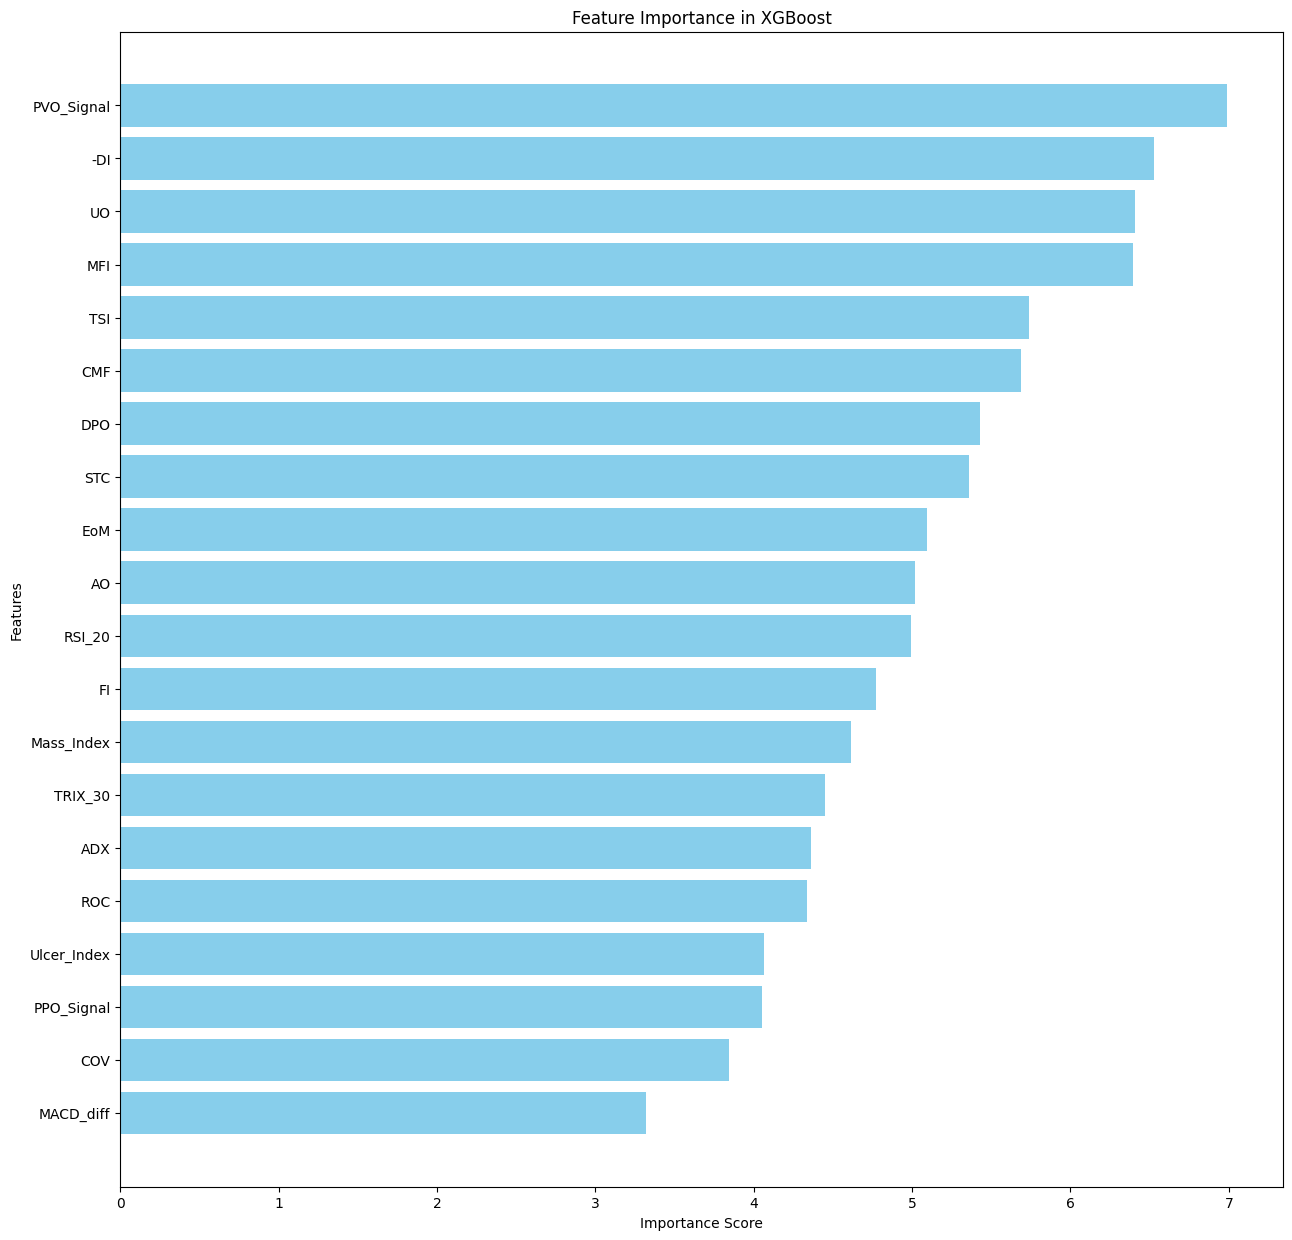

In [2583]:


# Example of feature importance
importance = model.get_booster().get_score(importance_type='gain')

# Sort features by importance
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)

# Unzip the sorted importance into feature names and their scores
features, scores = zip(*sorted_importance)

# Plotting the feature importance
plt.figure(figsize=(15, 15))
plt.barh(features, scores, color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance in XGBoost')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()


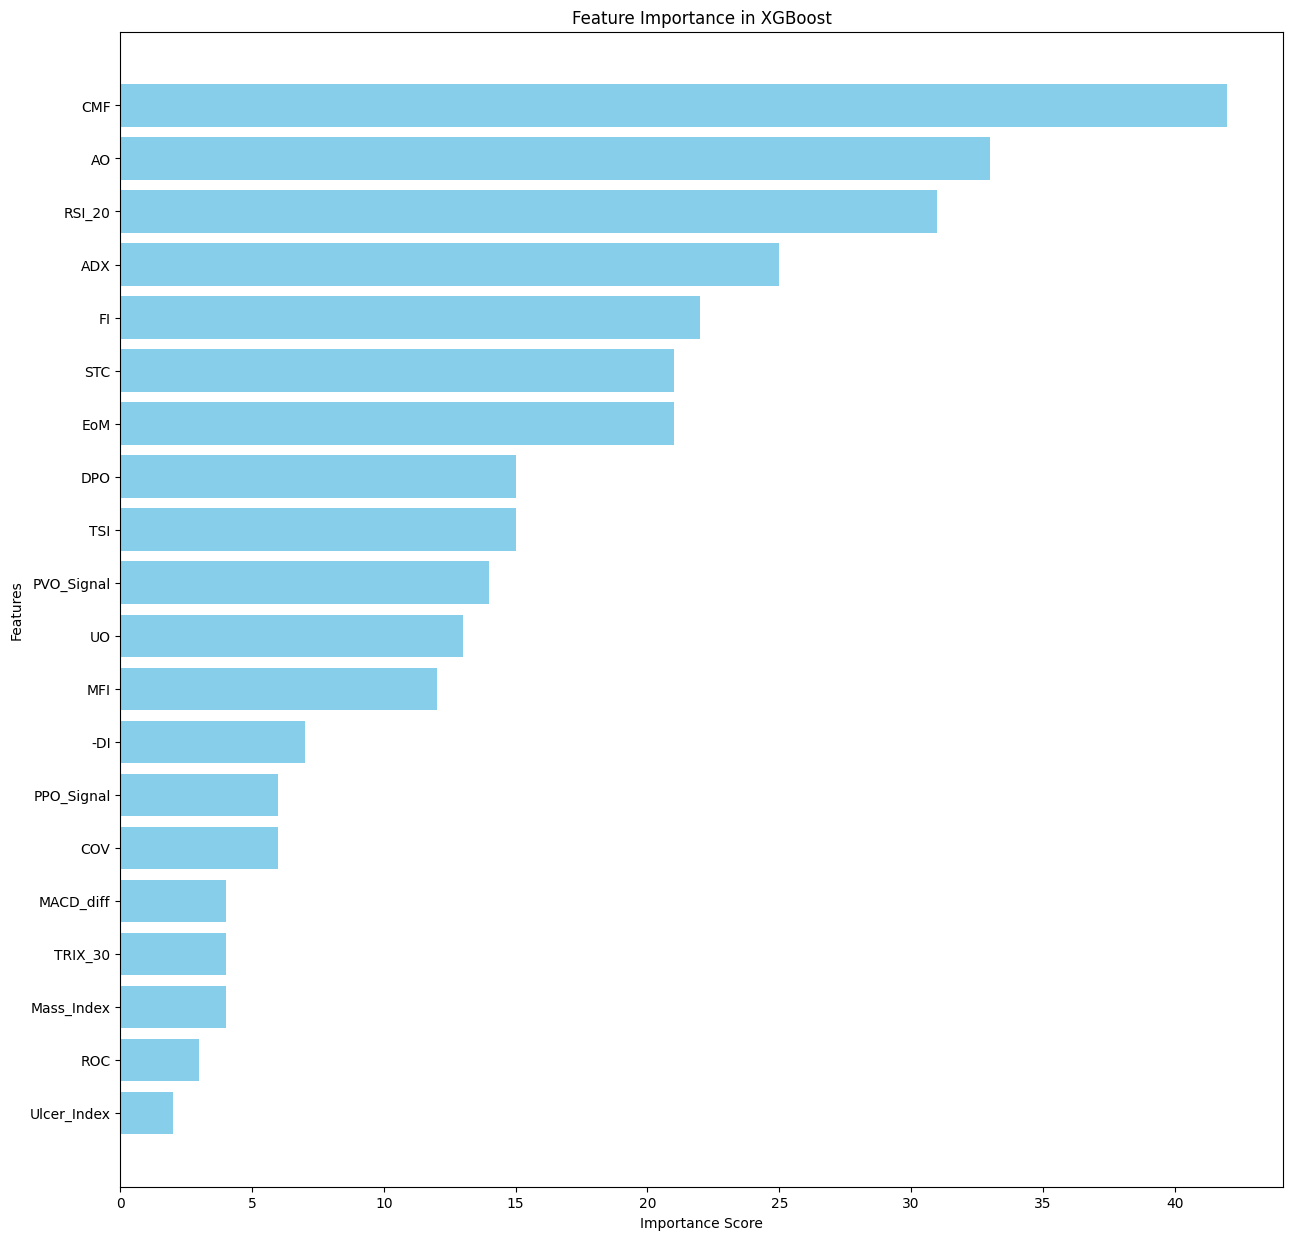

In [2584]:


# Example of feature importance
importance = model.get_booster().get_score(importance_type='weight')

# Sort features by importance
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)

# Unzip the sorted importance into feature names and their scores
features, scores = zip(*sorted_importance)

# Plotting the feature importance
plt.figure(figsize=(15, 15))
plt.barh(features, scores, color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance in XGBoost')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()


In [2585]:
#testing on test data
print(Y_test)

1522    0
1523    1
1524    0
1525    0
1526    1
       ..
1821    0
1822    1
1823    0
1824    0
1825    0
Name: Trade_Calls, Length: 304, dtype: int64


In [2586]:
print(model.predict(X_test))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1]


**WIN RATIO ON TEST DATA**

In [2587]:
print((np.sum(model.predict(X_test)==Y_test))/len(Y_test))

0.4868421052631579


In [2588]:
y_pred_test=model.predict(X_test)
for i in range(len(y_pred_test)):
    if y_pred_test[i]==0:
        y_pred_test[i]=-1
print(y_pred_test)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1]


In [2589]:
print(np.sum(y_pred_test*R_test))

-0.759447814687169


In [2590]:
test_results=y_pred_test*R_test
cum_test_results=np.cumsum(test_results)
cum_test_returns=np.cumsum(R_test)
cum_test_results=np.exp(cum_test_results)-1
cum_test_returns=np.exp(cum_test_returns)-1
print(cum_test_results)
print(cum_test_returns)

1522   -0.078463
1523   -0.071652
1524   -0.095774
1525   -0.105039
1526   -0.087774
          ...   
1821   -0.531746
1822   -0.529158
1823   -0.530225
1824   -0.532075
1825   -0.532075
Name: Log_Returns, Length: 304, dtype: float64
1522   -0.078463
1523   -0.071652
1524   -0.095774
1525   -0.105039
1526   -0.087774
          ...   
1821   -0.610138
1822   -0.607984
1823   -0.608871
1824   -0.610412
1825   -0.610412
Name: Log_Returns, Length: 304, dtype: float64


**CUMULATIVE RESULTS ON TEST DATA ARE -53 %, THIS IS PRIMARILY DUE TO
OVERFITTING AND HIGH IMBALANCE IN TRAIN TEST DATA , THE MODEL WILL PERFORM BETTER ON LARGER BACKTESTING DATA**

In [2591]:
print(len(X_test))

304


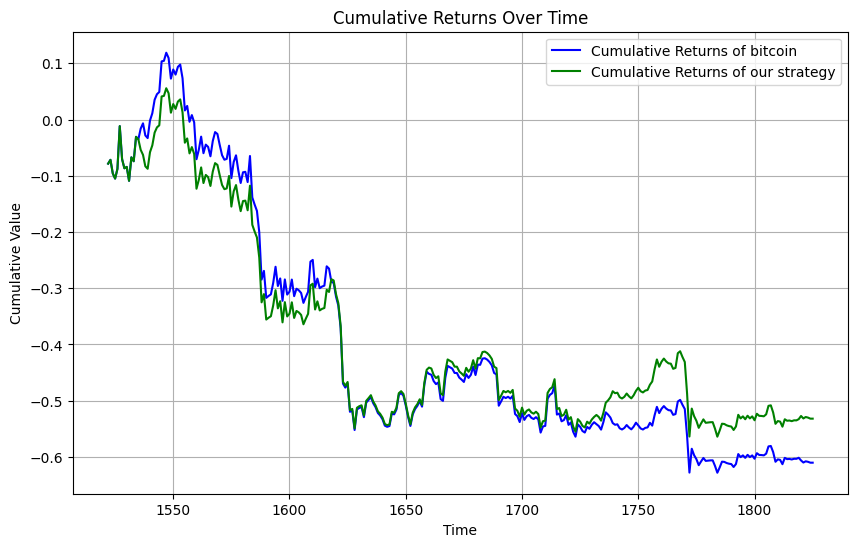

In [2592]:
import matplotlib.pyplot as plt

# Plot both cum_returns and cum_results
plt.figure(figsize=(10, 6))

# Plot cum_returns
plt.plot(cum_test_returns, label='Cumulative Returns of bitcoin ', color='blue')

# Plot cum_results
plt.plot(cum_test_results, label='Cumulative Returns of our strategy', color='green')

# Adding labels, title, and legend
plt.title('Cumulative Returns Over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Value')

# Optional: Show grid
plt.grid(True)

# Add legend to distinguish between the two lines
plt.legend()

# Show the plot
plt.show()


In [2593]:
#testing training data returns

In [2594]:
print(Y_train)

0       1
1       1
2       1
3       1
4       1
       ..
1364    0
1365    0
1366    1
1367    1
1368    1
Name: Trade_Calls, Length: 1369, dtype: int64


In [2595]:
print(model.predict(X_train))

[1 1 1 ... 1 1 1]


**WIN RATIO ON TRAIN DATA IS HIGH DUE TO OVERFITTING**

In [2596]:
print((np.sum(model.predict(X_train)==Y_train))/len(Y_train))

0.5566106647187729


In [2597]:
y_pred_train=model.predict(X_train)
for i in range(len(y_pred_train)):
    if y_pred_train[i]==0:
        y_pred_train[i]=-1
print(y_pred_train)

[1 1 1 ... 1 1 1]


In [2598]:
print(np.sum(y_pred_train*R_train))

2.0005444575874067


In [2599]:
train_results=y_pred_train*R_train
cum_train_results=np.cumsum(train_results)
cum_train_returns=np.cumsum(R_train)
cum_train_results=np.exp(cum_train_results)-1
cum_train_returns=np.exp(cum_train_returns)-1
print(cum_train_results)
print(cum_train_returns)

0       0.100241
1       0.110624
2       0.116866
3       0.251302
4       0.264033
          ...   
1364    5.500926
1365    5.290422
1366    5.387959
1367    5.734538
1368    6.393080
Name: Log_Returns, Length: 1369, dtype: float64
0       0.100241
1       0.110624
2       0.116866
3       0.251302
4       0.264033
          ...   
1364    2.113922
1365    2.013091
1366    2.059812
1367    2.225822
1368    2.541261
Name: Log_Returns, Length: 1369, dtype: float64


****

In [2600]:
print(len(X_train))

1369


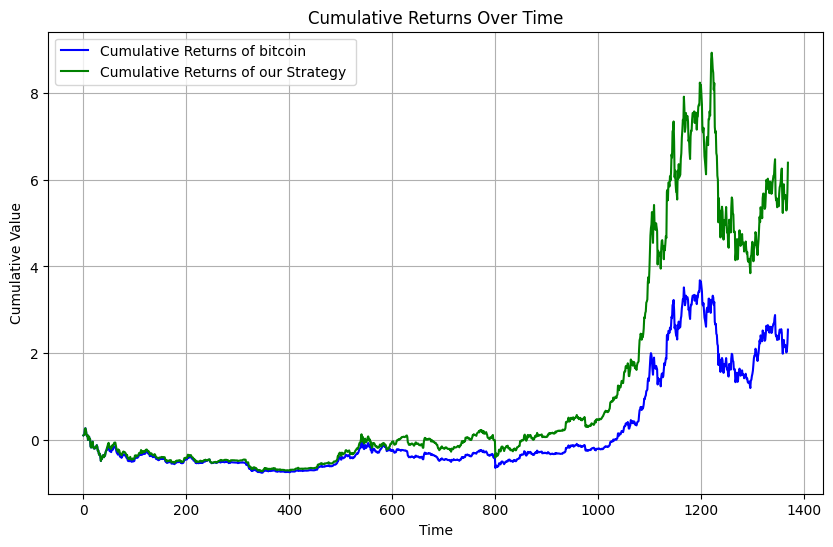

In [2601]:
import matplotlib.pyplot as plt

# Plot both cum_returns and cum_results
plt.figure(figsize=(10, 6))

# Plot cum_returns
plt.plot(cum_train_returns, label='Cumulative Returns of bitcoin', color='blue')

# Plot cum_results
plt.plot(cum_train_results, label='Cumulative Returns of our Strategy ', color='green')

# Adding labels, title, and legend
plt.title('Cumulative Returns Over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Value')

# Optional: Show grid
plt.grid(True)

# Add legend to distinguish between the two lines
plt.legend()

# Show the plot
plt.show()


In [2602]:
# !pip install -U vectorBT

In [2603]:
# import vectorbt as vbt

In [2604]:
# Close_prices = df['Close']
# signals =np.where(model.predict(df2)>0,1,0)
# signals = np.where(model.predict(df2)<0,-1,signals)
# portfolio = vbt.Portfolio.from_signals(Close_prices,
#                                        entries = (signals==1),
#                                        exits = (signals==-1),
#                                        freq = '1D',
#                                        fees=0.001,
#                                        slippage = 0.002,
#                                        sl_stop = 0.03,
#                                        tp_stop= 0.05,
#                                        init_cash=100000

#                                        )
# print(portfolio.stats())

In [2605]:
print(Log_Returns2)
backtesting_prediction=model.predict(df2)
for i in range(len(backtesting_prediction)):
    if backtesting_prediction[i]==0:
        backtesting_prediction[i]=-1
print(backtesting_prediction)
backtesting_result=backtesting_prediction*Log_Returns2    #signifies log_returns of strategy
print(backtesting_result)

0      0.004229
1     -0.000092
2      0.010818
3     -0.001688
4      0.007408
         ...   
644   -0.008355
645   -0.001362
646   -0.025525
647   -0.006418
648    0.000000
Name: Log_Returns, Length: 649, dtype: float64
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1 -1 -1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1  1  1  1  1
  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  

**WIN RATIO ON BACKTESTING RESULT=0.525**

In [2606]:
print(np.sum(backtesting_prediction*Log_Returns2>0)/len(backtesting_prediction))

0.5254237288135594


In [2607]:
print(np.sum(backtesting_result))

1.3318693996507727


In [2608]:
print(len(df2))

649


In [2609]:
cum_log_results=np.cumsum(backtesting_result)  #signifies cumulative log returns of strategy
results=np.exp(backtesting_result)-1           #signifies daily returns of strategy
print(results)
cum_results=np.exp(cum_log_results)-1          #signifies cumulative returns of strategy
print(cum_log_results)
print(cum_results)

0      0.004238
1     -0.000092
2      0.010876
3     -0.001687
4      0.007435
         ...   
644   -0.008320
645   -0.001361
646   -0.025202
647   -0.006397
648    0.000000
Name: Log_Returns, Length: 649, dtype: float64
0      0.004229
1      0.004137
2      0.014954
3      0.013266
4      0.020674
         ...   
644    1.365174
645    1.363812
646    1.338287
647    1.331869
648    1.331869
Name: Log_Returns, Length: 649, dtype: float64
0      0.004238
1      0.004145
2      0.015067
3      0.013354
4      0.020889
         ...   
644    2.916404
645    2.911075
646    2.812507
647    2.788118
648    2.788118
Name: Log_Returns, Length: 649, dtype: float64


**CUMULATIVE PORTFOLIO RETURN OF THE STRATEGY ON BEACKTESTING DATA OF 649 DAYS IS 278.8%**

In [2610]:
monthly_log_returns=[]
j=0
for i in range(len(cum_log_results)):
    if i%30==0:
        monthly_log_returns.append(cum_log_results[i]-cum_log_results[j])
        j=i
monthly_returns=np.exp(monthly_log_returns)-1
print(monthly_returns)
print(np.mean(monthly_returns))
print(np.std(monthly_returns))

[ 0.          0.42144419 -0.05788804  0.26213283 -0.05780626 -0.02813035
  0.08303204 -0.04456235 -0.04550313 -0.01484612  0.28334056  0.09385422
  0.12746338 -0.01125468  0.30476033  0.27683344 -0.00873677  0.0188717
 -0.09864863  0.06408871 -0.02497398  0.06912326]
0.07329974334777213
0.1416515942750551


In [2611]:
monthly_sharpe_ratio=np.sqrt(12)*np.mean(monthly_returns)/np.std(monthly_returns)
print(monthly_sharpe_ratio)

1.7925513695747746


**THE ANNUALISED SHARPE RATIO OF THE STRATEGY IS 1.79**

In [2612]:
max=0
max_array=[]
for i in range(len(cum_log_results)):
    if cum_log_results[i]>max:
        max=cum_log_results[i]
        max_array.append([i,max])
print(max_array)

[[0, 0.0042290284164013415], [2, 0.014954295955164648], [4, 0.020673670840690564], [6, 0.027527716704705787], [7, 0.03477730004765783], [8, 0.04869431477779137], [9, 0.07716884512523442], [10, 0.1271439930163335], [11, 0.18158094144230774], [12, 0.23393060402957394], [14, 0.24280612563324352], [18, 0.31102652965373667], [19, 0.3148073221024465], [21, 0.3232680898569694], [23, 0.331117067706804], [27, 0.35884747357881375], [44, 0.3816541182228152], [46, 0.39122203804956135], [47, 0.3947064847294417], [49, 0.4009031509912945], [73, 0.4094945291246946], [74, 0.49743092621687046], [76, 0.5192214926638804], [78, 0.5266365601563631], [80, 0.5336768885610738], [86, 0.5355308858572717], [88, 0.5389239531629113], [98, 0.5782778710136695], [99, 0.59900875448047], [101, 0.6032836822222566], [102, 0.6071862298833915], [294, 0.6158552125360331], [295, 0.6432394019930726], [296, 0.6610451403394029], [300, 0.663113262713395], [302, 0.6664217571936416], [303, 0.6886329725056916], [310, 0.6957216012387

In [2613]:
max_drawdown = 0
for i in range(len(max_array)):
    current_min=max_array[i][1]
    drawdown=0
    end_idx=len(cum_log_results)-1 if i==len(max_array)-1 else max_array[i+1][0]
    for j in range(max_array[i][0],end_idx+1):
        if cum_log_results[j]<current_min:
            current_min=cum_log_results[j]
            drawdown=max_array[i][1]-current_min
    if drawdown>max_drawdown:
        max_drawdown=drawdown
max_drawdown=np.exp(max_drawdown)-1
print(max_drawdown)


0.32445512723032466


**THE MAXIMUM DRAWDOWN OF THE STRATEGY IS 32% WHICH IS HIGH DENOTING THAT OUR STRATEGY IS RISKY EVEN THOUGH RISK IS COMPENSATED BY REWARD AS DENOTED BY THE SHARPE RATIO VALUE**

In [2614]:
cum_log_returns=np.cumsum(Log_Returns2)
cum_returns=np.exp(cum_log_returns)-1
print(cum_log_returns)
print(cum_returns)

0      0.004229
1      0.004137
2      0.014954
3      0.013266
4      0.020674
         ...   
644    1.322145
645    1.320783
646    1.295258
647    1.288840
648    1.288840
Name: Log_Returns, Length: 649, dtype: float64
0      0.004238
1      0.004145
2      0.015067
3      0.013354
4      0.020889
         ...   
644    2.751460
645    2.746355
646    2.651938
647    2.628576
648    2.628576
Name: Log_Returns, Length: 649, dtype: float64


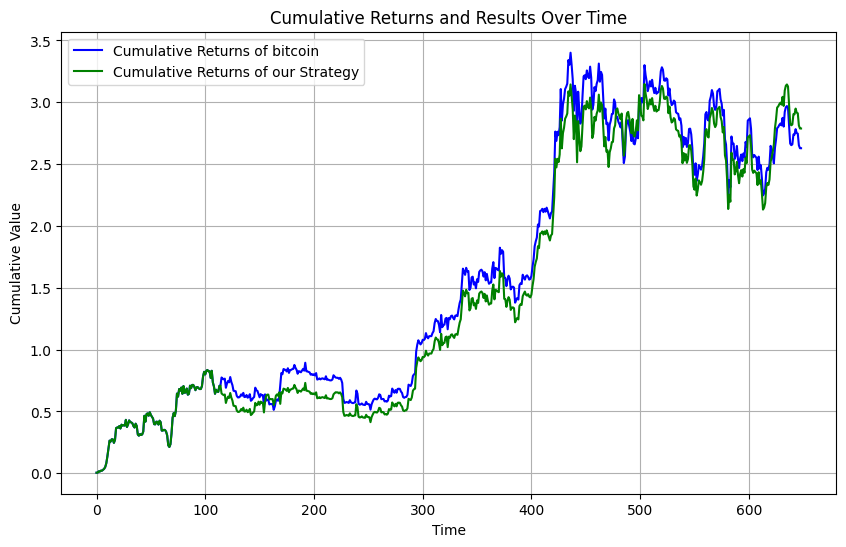

In [2615]:
import matplotlib.pyplot as plt

# Plot both cum_returns and cum_results
plt.figure(figsize=(10, 6))

# Plot cum_returns
plt.plot(cum_returns, label='Cumulative Returns of bitcoin', color='blue')

# Plot cum_results
plt.plot(cum_results, label='Cumulative Returns of our Strategy', color='green')

# Adding labels, title, and legend
plt.title('Cumulative Returns and Results Over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Value')

# Optional: Show grid
plt.grid(True)

# Add legend to distinguish between the two lines
plt.legend()

# Show the plot
plt.show()


# New Section

**WE USE A NEW APPROACH FOR RISK MANAGEMENT OF OUR STRATEGY BY USING XGBREGRESSOR INSTEAD OF CLASSIFIER AND THEN CHOOSING A LONG SHORT SPLIT BASED ON T-DISTRIBUTION PROBABILITY DENSITY**

In [2616]:
from xgboost import XGBRegressor

In [2617]:
model_2=XGBRegressor()

In [2618]:
opt = BayesSearchCV(estimator=model,
                    search_spaces=param_space,
                    n_iter=32,   # Number of optimization steps
                    cv=3,        # Cross-validation splits
                    verbose=0,
                    n_jobs=-1,   # Use all cores
                    random_state=42)

In [2619]:
# opt.fit(X_train,R_train)
# print("Best parameters found: ", opt.best_params_)
# print("Best score: ", opt.best_score_)

In [2620]:
model_2=XGBRegressor(
     alpha=0.01,
    colsample_bytree=0.3,
    reg_lambda=0.5,
    learning_rate=0.01,
    max_depth=1,
    n_estimators=100,
    subsample=1,
    random_state=42,  # Setting the random state for reproducibility
    use_label_encoder=False,  # To avoid warnings    # Set evaluation metric
)
model_2.fit(X_train,R_train,verbose=True,eval_set=[(X_train,R_train),(X_test,R_test)])

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:39:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:0.04121	validation_1-rmse:0.03359
[1]	validation_0-rmse:0.04121	validation_1-rmse:0.03359
[2]	validation_0-rmse:0.04121	validation_1-rmse:0.03359
[3]	validation_0-rmse:0.04120	validation_1-rmse:0.03358
[4]	validation_0-rmse:0.04120	validation_1-rmse:0.03358
[5]	validation_0-rmse:0.04119	validation_1-rmse:0.03357
[6]	validation_0-rmse:0.04119	validation_1-rmse:0.03357
[7]	validation_0-rmse:0.04119	validation_1-rmse:0.03357
[8]	validation_0-rmse:0.04118	validation_1-rmse:0.03356
[9]	validation_0-rmse:0.04118	validation_1-rmse:0.03356
[10]	validation_0-rmse:0.04118	validation_1-rmse:0.03356
[11]	validation_0-rmse:0.04118	validation_1-rmse:0.03356
[12]	validation_0-rmse:0.04117	validation_1-rmse:0.03356
[13]	validation_0-rmse:0.04117	validation_1-rmse:0.03356
[14]	validation_0-rmse:0.04117	validation_1-rmse:0.03356
[15]	validation_0-rmse:0.04117	validation_1-rmse:0.03356
[16]	validation_0-rmse:0.04116	validation_1-rmse:0.03356
[17]	validation_0-rmse:0.04116	validation

XGBRegressor(alpha=0.01, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=1, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

**Using t-distribution **

In [2621]:
# import random
# import numpy as np
# from scipy import stats
# a = np.linspace(30,100,71)
# print(a)
# maximum= -1

# log_returns_list = log_returns.tolist()
# del log_returns_list[0]
# sample_values=[]
# for iterations in range(1,51):
#     for i in a:
#         i = int(i)
#         sample = random.sample(log_returns_list,i)
#         #print(sample)
#         df_est,loc,scale=stats.t.fit(sample)
#         ks_stat,p_value=stats.kstest(sample,'t', args=(df_est,loc,scale))
#         #print(p_value)
#         if p_value>maximum:

#             best_value=i
#             maximum=p_value

#     #print(best_value)

#     sample_values.append(best_value)
# #print(sample_values)

# #len(sample_values)
# Optimum_sample_size = np.mean(sample_values)
# print(Optimum_sample_size)



Ideal Sample Size: 38

In [2622]:
# random_sample=random.sample(log_returns_list,int(Optimum_sample_size))
# print(random_sample)
# a,b,c = stats.t.fit(random_sample)
# print(a)
# print(b)
# print(c)
# ks_stat,p_value = stats.kstest(random_sample,'t',args=(a,b,c))
# print(p_value)


parameters of t_distribution found to be:
a=0.0002167201883039903
b=0.027202880022048473
c=0.9415385878297772
p_value=0.94

**NOTE THAT P_VALUE DENOTES WHAT RATIO OF RANDOM SAMPLES OF SIZE 38 FOLLOW T-DISTRIBUTION MORE CLOSELY THAN NORMAL DISTRIBUTION SO HIGH P_VALUE OF 0.94 DENOTES THIS RANDOM SAMPLE SIZE DATA MORE CLOSELY FOLLOWS T-DISTRIBUTION **

In [2623]:
a=0.0002167201883039903
b=0.027202880022048473
c=0.9415385878297772

In [2624]:
from scipy.stats import t

**HERE WE DIVIDE THE PREDICTED LOG RETURNS OF THE MODEL WITH IT'S PROBABILITY DENSITY FUNCTION  BASED ON WHICH WE MAKE OUR PREDICTION **

In [2625]:
y_pred=model_2.predict(X_test)
pdf_t=t.pdf(y_pred,a,b,c)
output=y_pred/pdf_t
print(output)

[ 0.01313009 -0.00274069 -0.00274069 -0.00274069 -0.03040988 -0.03040988
 -0.01444834 -0.00274069 -0.03040988 -0.03040988 -0.03040988 -0.03040988
 -0.03040988 -0.01444834 -0.01444834  0.01313009 -0.01444834 -0.01444834
 -0.01444834 -0.01444834  0.36335106  0.38870631  0.36335106  0.36335106
  0.39395939  0.39395939  0.39395939  0.39395939  0.39395939  0.41912779
  0.39395939  0.39395939  0.39395939  0.37938774  0.00299324 -0.03040988
 -0.03040988 -0.03040988 -0.03040988 -0.03040988 -0.03040988 -0.03040988
 -0.03040988 -0.03040988 -0.03040988 -0.03040988 -0.03040988 -0.03040988
 -0.03040988 -0.03040988 -0.00274069 -0.03040988 -0.03040988 -0.03040988
 -0.03040988 -0.03040988 -0.03040988 -0.03040988 -0.03040988 -0.03040988
 -0.03040988 -0.03040988 -0.01444834 -0.03040988  0.35415883 -0.03040988
  0.35415883  0.35415883  0.35415883  0.35415883 -0.03040988 -0.03040988
 -0.03040988 -0.03040988 -0.03040988  0.1446596   0.1446596   0.1446596
  0.17131965  0.1446596   0.17131965  0.17131965  0.

**WE USE SIGMOID FUNCTION WITH W=10 TO TRANSFORM OUR EXPECTED RETURNS TO A VALUE BETWEEN 0 AND 1 , 0 SIGNIFYING PURE SHORT AND 1 SIGNIFYING PURE LONG WHILE 0.5 SIGNIFIES NO DECISIVE TRADE SINCE EXPECTED RETURNS ARE ZERO**

In [2626]:
def sigmoid(x,w):
    return 1 / (1 + np.exp(-w*x))

In [2627]:
w=[0.01,0.1,1,10,100,1000,10000,100000,1000000]
for i in w:
    y=sigmoid(output,i)
    print(i)
    print(y)

0.01
[0.50003283 0.49999315 0.49999315 0.49999315 0.49992398 0.49992398
 0.49996388 0.49999315 0.49992398 0.49992398 0.49992398 0.49992398
 0.49992398 0.49996388 0.49996388 0.50003283 0.49996388 0.49996388
 0.49996388 0.49996388 0.50090838 0.50097176 0.50090838 0.50090838
 0.5009849  0.5009849  0.5009849  0.5009849  0.5009849  0.50104782
 0.5009849  0.5009849  0.5009849  0.50094847 0.50000748 0.49992398
 0.49992398 0.49992398 0.49992398 0.49992398 0.49992398 0.49992398
 0.49992398 0.49992398 0.49992398 0.49992398 0.49992398 0.49992398
 0.49992398 0.49992398 0.49999315 0.49992398 0.49992398 0.49992398
 0.49992398 0.49992398 0.49992398 0.49992398 0.49992398 0.49992398
 0.49992398 0.49992398 0.49996388 0.49992398 0.5008854  0.49992398
 0.5008854  0.5008854  0.5008854  0.5008854  0.49992398 0.49992398
 0.49992398 0.49992398 0.49992398 0.50036165 0.50036165 0.50036165
 0.5004283  0.50036165 0.5004283  0.5004283  0.50036165 0.50036165
 0.50036165 0.50036165 0.50036165 0.50036165 0.5004001  0

<ipython-input-2626-18bd8d8e60b6>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-w*x))


In [2628]:
#we choose w=10

In [2629]:
    w=7.5
    y=sigmoid(output,w)
    log_returns=np.array(R_test)
    cum_logreturn=np.cumsum((y-(1-y))*log_returns)
    print(cum_logreturn)

[-0.00402011 -0.0040958  -0.00382522 -0.00371938 -0.00588903 -0.0149861
 -0.01166926 -0.01148762 -0.01179747 -0.00868364 -0.01388985 -0.01303501
 -0.01824469 -0.01799542 -0.01905397 -0.01858606 -0.01739963 -0.01713628
 -0.01885562 -0.01955266  0.00110057  0.00955895  0.0128743   0.05721496
  0.05808971  0.06974387  0.06215873  0.03181988  0.04537178  0.03769981
  0.0491185   0.05250611  0.03233021 -0.01654938 -0.01646083 -0.0132918
 -0.01464061 -0.0131826  -0.00543612 -0.00746757 -0.01023435 -0.00673167
 -0.00856161 -0.00808014 -0.00607051 -0.00931094 -0.01118039 -0.01079422
 -0.00847942 -0.00629794 -0.00621018 -0.00638422 -0.00921118 -0.00212578
 -0.0057163  -0.00715794 -0.00380118 -0.00102675 -0.00343307 -0.00354169
 -0.00124316 -0.00701243 -0.00256674 -0.00089111 -0.01255423 -0.00726208
 -0.10382795 -0.08512262 -0.1442184  -0.13986801 -0.14033466 -0.14367687
 -0.14814845 -0.14275635 -0.14490968 -0.1732063  -0.146151   -0.165119
 -0.16094916 -0.1457909  -0.16964497 -0.15885017 -0.160

In [2630]:
y_pred=model_2.predict(X_train)
pdf_t=t.pdf(y_pred,a,b,c)
output=y_pred/pdf_t
y=sigmoid(output,w)
log_returns=np.array(R_train)
cum_logreturn=np.cumsum(np.where(y>0.5 ,(y)*log_returns ,-(1-y)*log_returns))
print(cum_logreturn)

[-0.05318797 -0.05841774 -0.06153811 ...  6.59712761  6.56771086
  6.5185383 ]


In [2631]:
print(Log_Returns2)
backtesting_prediction=model_2.predict(df2)
print(backtesting_prediction)
pdf_t=t.pdf(backtesting_prediction,a,b,c)
backtesting_prediction=backtesting_prediction/pdf_t
y=sigmoid(backtesting_prediction,w)
backtesting_result=(y-(1-y))*Log_Returns2    #signifies log_returns of strategy
print(backtesting_result)

0      0.004229
1     -0.000092
2      0.010818
3     -0.001688
4      0.007408
         ...   
644   -0.008355
645   -0.001362
646   -0.025525
647   -0.006418
648    0.000000
Name: Log_Returns, Length: 649, dtype: float64
[-1.0755910e-04 -1.0755910e-04 -1.0755910e-04 -1.0755910e-04
 -1.0755910e-04 -1.0755910e-04 -1.0755910e-04 -1.0755910e-04
 -1.0755910e-04 -1.0755910e-04 -1.0755910e-04 -1.0755910e-04
 -1.0755910e-04 -5.1187468e-05 -5.1187468e-05 -5.1187468e-05
 -5.1187468e-05 -5.1187468e-05 -5.1187468e-05  1.7842798e-03
  1.3414511e-03  1.3414511e-03  1.3414511e-03  1.3414511e-03
  1.3414511e-03  1.3414511e-03  1.3414511e-03  1.3414511e-03
  1.3414511e-03  1.3414511e-03  1.3414511e-03  1.3414511e-03
  1.3414511e-03  1.3414511e-03  1.3414511e-03  1.2850793e-03
  1.2850793e-03  1.4596338e-03  1.4032620e-03  2.0530478e-03
  2.0530478e-03  2.0530478e-03  6.3936051e-04  5.2117789e-04
  1.9138167e-03  2.0883714e-03  2.0883714e-03  2.0883714e-03
  2.0883714e-03  2.0883714e-03  2.0883714e-03

In [2632]:
cumulative_log_results=np.cumsum(backtesting_result)
cumulative_results=np.exp(cumulative_log_results)-1
print(cumulative_results)

0     -0.000480
1     -0.000470
2     -0.001697
3     -0.001505
4     -0.002345
         ...   
644    0.688905
645    0.689167
646    0.694069
647    0.695304
648    0.695304
Name: Log_Returns, Length: 649, dtype: float64


**USING THIS MODEL WE GET CUMULATIVE RETURNS OF 70% ON BACKTESTING DATA OF 649 WHICH IS SMALL BUT THE CORRESPONDING RISK IS LOWERED AS EXPLAINED FURTHER , HENCE A RISK AVERSE WILL CHOOSE SUCH A MODEL WITHOUT INVESTING FULL AMOUNT AT ONCE AND CHOOSING A LONG SHORT SPLIT **

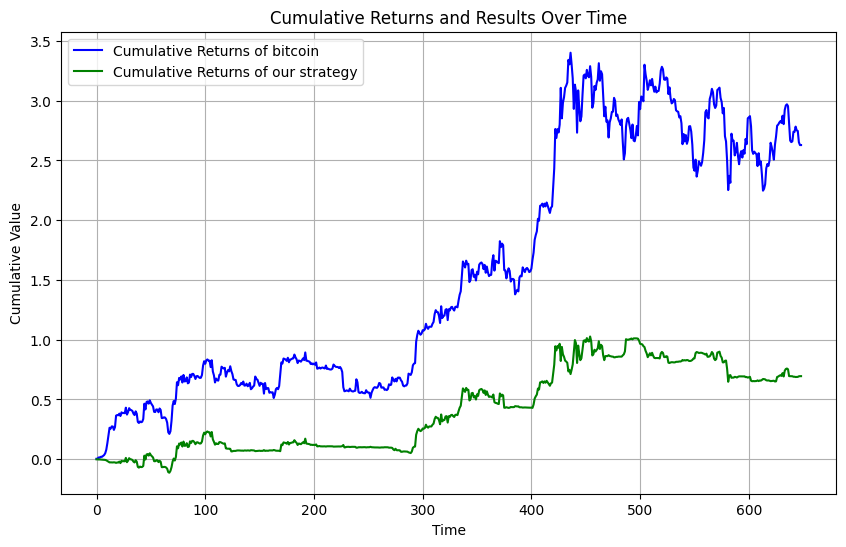

In [2633]:
import matplotlib.pyplot as plt

# Plot both cum_returns and cum_results
plt.figure(figsize=(10, 6))

# Plot cum_returns
plt.plot(cum_returns, label='Cumulative Returns of bitcoin', color='blue')

# Plot cum_results
plt.plot(cumulative_results, label='Cumulative Returns of our strategy', color='green')

# Adding labels, title, and legend
plt.title('Cumulative Returns and Results Over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Value')

# Optional: Show grid
plt.grid(True)

# Add legend to distinguish between the two lines
plt.legend()

# Show the plot
plt.show()


In [2634]:
monthly_log_returns=[]
j=0
for i in range(len(cumulative_log_results)):
    if i%30==0:
        monthly_log_returns.append(cumulative_log_results[i]-cumulative_log_results[j])
        j=i
monthly_returns=np.exp(monthly_log_returns)-1
print(monthly_returns)
print(np.mean(monthly_returns))
print(np.std(monthly_returns))

[ 0.00000000e+00  9.40424916e-03 -7.40846153e-02  2.23165628e-01
 -4.69590782e-02 -1.58726769e-02  6.42080971e-02 -2.83740595e-02
 -9.77600049e-03 -2.95505875e-05  1.45977556e-01  9.06721975e-02
  1.23155814e-01 -6.87300304e-02  1.97825158e-01  1.52616305e-01
 -6.15309510e-02  5.77001233e-03 -2.33103932e-02  6.63466192e-03
 -8.26995660e-02  6.69962948e-03]
0.02794374486559422
0.08759954916616011


In [2635]:
monthly_sharpe_ratio=np.sqrt(12)*np.mean(monthly_returns)/np.std(monthly_returns)
print(monthly_sharpe_ratio)

1.1050281952740495


**THE SHARPE RATIO IS FOUND TO BE 1.08 WHICH SAYS THAT THE RETURNS ARE SIGNIFICANT COMPARED TO THE AMOUNT OF RISK**

In [2636]:
max=0
max_array=[]
for i in range(len(cumulative_log_results)):
    if cumulative_log_results[i]>max:
        max=cumulative_log_results[i]
        max_array.append([i,max])
print(max_array)

[[27, 0.011462894271572797], [44, 0.02987849197728798], [46, 0.03914872407526221], [47, 0.042524758787134506], [49, 0.04852862749854249], [74, 0.10262514571032269], [76, 0.12385404854997648], [78, 0.13111716649988925], [80, 0.13797430563028157], [86, 0.13960569911501658], [88, 0.14289319754904395], [98, 0.18102269267935664], [99, 0.20110857391720702], [101, 0.20525049536784987], [102, 0.2090316226397357], [295, 0.21113984159928592], [296, 0.22718227551606707], [300, 0.22910348544416737], [302, 0.23232589293129624], [303, 0.2538460482889112], [310, 0.260714127746238], [311, 0.28999978550864575], [312, 0.3042767227834619], [317, 0.3182595927153564], [333, 0.3382380396544371], [334, 0.3581314279405208], [335, 0.3698720284194605], [336, 0.4184757504923475], [337, 0.4655301298155347], [340, 0.468024642893842], [408, 0.4965079675364972], [409, 0.49772132812215086], [410, 0.5018422520873186], [414, 0.5045869475350894], [420, 0.5413415794992317], [421, 0.5829583683361599], [422, 0.665450194704

In [2637]:
max_drawdown = 0
for i in range(len(max_array)):
    current_min=max_array[i][1]
    drawdown=0
    end_idx=len(cumulative_log_results)-1 if i==len(max_array)-1 else max_array[i+1][0]
    for j in range(max_array[i][0],end_idx+1):
        if cumulative_log_results[j]<current_min:
            current_min=cumulative_log_results[j]
            drawdown=max_array[i][1]-current_min
    if drawdown>max_drawdown:
        max_drawdown=drawdown
max_drawdown=np.exp(max_drawdown)-1
print(max_drawdown)

0.22978574689218267


**SUCH A STRATEGY HAS A MUCH LOWER DRAWDOWN OF 25% COMPARED TO PURE LONG-SHORT STRATEGY**